# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цель и ход исследования

**Цели:**
1. Установить параметры, которые влияют на рыночную стоимость объекта
2. Выявить интересные закономерности на рынке недвижимости

**Задачи:**
1. Получить данные
2. Ознакомиться с общей ифнормацией о данных, чтобы иметь первичное представление
3. Выполнить предобработку данных: возможно, в данных есть ошибки, пропуски, аномалии, которые могу привести к искажению результата.
4. Провести исследовательский анализ данных: изучить различные параметры, определить, какие факторые оказывают более сильное влияние на цену объекта, определить ТОП10 населенных пунктов, где квартир продается больше всего
5. Этапы исследования сопроводить графиками, промежуточными выводами и финальным выводом

### Откройте файл с данными и изучите общую информацию 

In [1]:
import pandas as pd
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

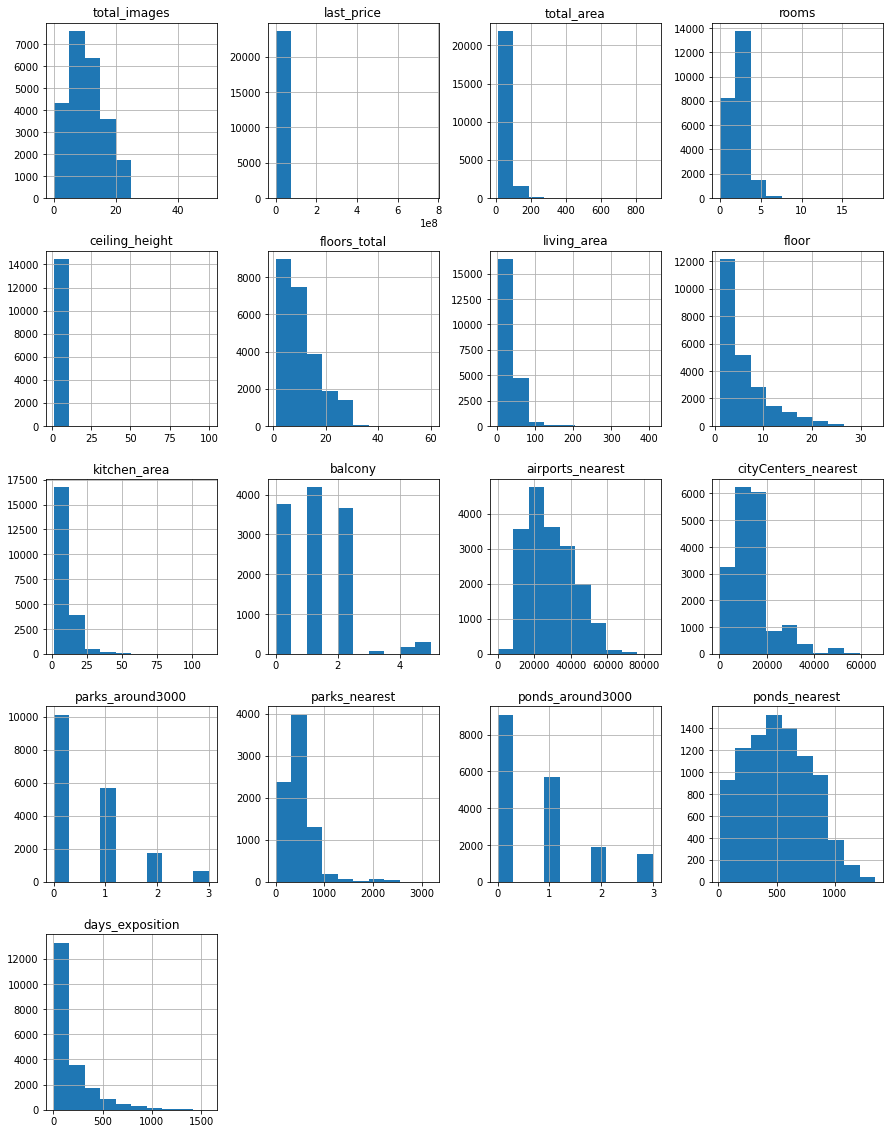

In [3]:
data.hist(figsize=(15, 20));

### Предобработка данных

**2.1 ПРОПУСКИ**

**Определим, в каких столбцах есть пропущенные значения и сколько их**

In [4]:
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Попущенные значения есть в 14 столбцах - это много.\
Разберем, в каких столбцах возможна замена значения.

**ceiling_height, floors_total**: причина пропуска может быть любая - пользователь не указал, техническая ошибка.\
Эти столбцы оставим, как есть.\
В столбце ceiling height более 9000 пустых значений, это около 40% - слишком большая выборка. Поэтому, например, нули и среднее исказят результаты.\
Инструмента для заполнения floors total у нас тоже нет, так как кол-во этажей может быть любое.
**locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest**: эти столбцы оставим, как есть, посколько это картографические данные, и мы не можем точно предположить их значения. Они могут быть любыми. Причина пропуска может быть любая - например, техническая ошибка\
**days_exposition**: оставим, как есть, так как значение может быть любым - у нас нет инструмента для заполнения данных пустых значений. Причина пропуска может быть любая - техническая ошибка (по какой-то причине не рассчитывалось время размещения), или просто на момент выгрузки данных объявление еще было размещено.

**balcony:** поскольку эти данные заполняли сами пользователи, скорей всего, балкона просто нет. Поэтому пропущенные значения можно заменить на 0.\
**kitchen_area, living_area**: значения этих столбцов мы можем попробовать вычислить, так как нам везде известна общая площадь total_area. Вероятная причина пропуска - пользователь не указал данные.\
**is_apartment**: данное значение мы также можем вычислить, так как в датафрейме всего 2 типа жилья: студия и апартаменты. В столбце Studio пустых значений нет, значит по не нему мы можем определить. Вероятная причина пропуска - пользователь не указал данные.\
**locality name**: не указано название населенного пункта. Скорей всего, пользователь его не заполнил. Такие строки мы удалим, так как название населенного пункта - один из основных критериев. Без него объявление неинформативно.

**Заменим пропущенные значения, где это возможно**

При выведении датафреймя, сразу заметны строки, где по самым важным для нас параметрам (жилая площадь, площадь кухни, расстояние до ближ. аэропорта, парка, центра, высота потолка - отсутствует энформация. Такие объявления мало информативны, по ним все равно нельзя сделать никаких выводов. Посчитаем, сколько их

In [5]:
len(data[(data['ceiling_height'].isna())&(data['kitchen_area'].isna())&(data['living_area'].isna())&(data['airports_nearest'].isna())&(data['parks_nearest'].isna())&(data['cityCenters_nearest'].isna())])

316

**LOCALITY NAME**

In [6]:
#посчитаем, сколько объявлений без указания населенного пункта
len(data[data['locality_name'].isna()])

49

In [7]:
#оставим в дата фрейме только строки, где указан населенный пункт
data=data[data['locality_name'].notna()]

In [8]:
#проверим, выполнилось ли изменение
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**BALCONY** - заменим пропущенные значения на нули и проверим, выполнена ли замена)

In [9]:
data['balcony']=data['balcony'].fillna(0)

In [10]:
data['balcony'].isna().sum()

0

**KITCHEN AREA** - вычислим площадь кухни там, где это возможно: где известна общая площадь, вычтем из нее жилую, и получим площадь кухни. Проверим, выполнилось ли действие

In [11]:
data.loc[(data['kitchen_area'].isna())&(data['living_area'].notna()),'kitchen_area']=data['total_area']-data['living_area']

In [12]:
data['kitchen_area'].isna().sum()

1460

**LIVING AREA** - вычислим жилую площадь там, где это возможно: где известна общая площадь, вычтем из нее площадь кухни, и получим жилую площадь. Проверим, выполнилось ли действие

In [13]:
data.loc[(data['living_area'].isna())&(data['kitchen_area'].notna()),'living_area']=data['total_area']-data['kitchen_area']

In [14]:
data['living_area'].isna().sum()

1460

In [15]:
data.loc[(data['kitchen_area'].isna())&(data['living_area'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,NaN,13,NaN,...,NaN,0.0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.0,38.0,2018-06-23T00:00:00,1,2.55,16.0,NaN,15,NaN,...,NaN,1.0,Санкт-Петербург,31118.0,7257.0,1.0,241.0,1.0,230.0,113.0
23642,14,5950000.0,80.3,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0


*Кол-во пустых значений в kitchen area и living area сократилось, но все равно осталось 1464 значения, где ни площадь кухни, ни жилую площадь вычислить нельзя, так как нет ни тех, ни других данных. Пока оставим их, как есть*

**IS APARTMENT** - заполним пропуски по столбцу Studio: если студия, значит не аппартаменты. И наоборот-если не студия, значит аппартаменты

Промежуточные расчеты

In [16]:
#сколько пустых значений в is studio
data['studio'].isna().sum()

0

In [17]:
#уникальные значения в столбце
data['studio'].unique()

array([False,  True])

In [18]:
#сколько объявлений со студиями
data['studio'].count()

23650

In [19]:
#сколько сейчас студий
data[data['studio']==True]['studio'].count()

149

In [20]:
##сколько пустых значений в is apartment
data['is_apartment'].isna().sum()

20890

In [21]:
#уникальные значения в столбце
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [22]:
#сколько сейчас апартаментов
data['is_apartment'].count()

2760

Заполним пропуски и проверим, выполнилось ли действие

In [23]:
data.loc[(data['studio']==False)&(data['is_apartment'].isna()),'is_apartment']=True

In [24]:
data['is_apartment'].isna().sum()

134

In [25]:
data.loc[(data['studio']==True)&(data['is_apartment'].isna()),'is_apartment']=False

In [26]:
data['is_apartment'].isna().sum()

0

In [27]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1460
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1460
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

**2.2 ИЗМЕНЕНИЕ ТИПОВ ДАННЫХ**

In [28]:
data.dtypes #узнаем тип данных в каждом столбце

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

**first_day_exposition** - изменим на формат datetime, так как нам понадобится извлечение месяца и недели в дальнейшем\
**is_apartment** - изменим на bool, так как это булево значение\
**floor и balcony** с типом float изменим на целое, так как значения этих столбцов могут быть только целыми числами\
**last price** - округлим и изменим на тип int, так как вряд ли квартиры продаются с копейками

In [29]:
data['balcony']=data['balcony'].round().astype('int64')

In [30]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [31]:
data['is_apartment']=data['is_apartment'].astype('bool')

In [32]:
data['floors_total']=data['floors_total'].round().astype('Int64')

In [33]:
data['last_price']=data['last_price'].round().astype('int64')

In [34]:
#проверим, выполнены ли изменения
data.dtypes 

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

**2.3 УДАЛЕНИЕ ЯВНЫХ И НЕЯВНЫХ ДУБЛИКАТОВ**

In [35]:
#проверим датафрейм на наличие явных дубликатов
data.duplicated().sum()

0

В датафрейме встречается множество таких неявных дубликатов как "Поселок Рябово" и "Рябово", оставим только сами названия населенных пунктов, выполнив замену подстрок

In [36]:
data['locality_name'] = data['locality_name'].replace('посёлок |поселок |деревня |село |городской поселок |городской посёлок| садовое товарищество |посёлок городского типа|городского типа |садоводческое некоммерческое товарищество |садовое товарищество |при железнодорожной станции|имени|коттеджный|станции| ', '', regex=True)

In [37]:
#отсортируем полученный список в алфавитном порядке и проверим еще раз, нет ли дубликатов
name_sorted=data['locality_name'].sort_values().unique()
name_sorted

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'БольшаяВруда', 'БольшаяИжора',
       'БольшаяПустомержа', 'БольшиеКолпаны', 'БольшоеРейзино',
       'БольшойСабск', 'Бор', 'БорисоваГрива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'ВахноваКара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'ДружнаяГорка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичё

**2.3 ВЫЯВЛЕНИЕ АНОМАЛИЙ**

In [38]:
#Сохраним данные с первичной обработой в новую переменную new_data, и дальнейшие изменения будем производить с ней, чтобы можно было вернуться к исходной дате в случае необходимости
data_new=data

**CEILING HEIGHT**

In [39]:
#посмотрим список уникальных значений
data_new['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [40]:
#опишем график
data_new['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

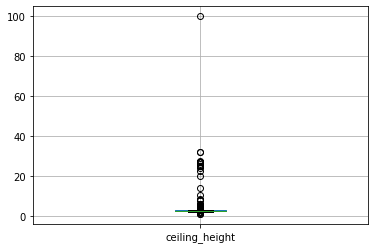

In [41]:
#построим диаграмму размаха
data_new.plot(kind='box',y='ceiling_height',grid=True,legend=True)

<AxesSubplot:>

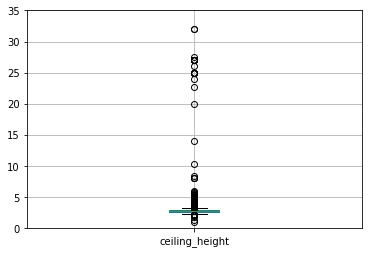

In [42]:
#одно значение сильно выбивается из общего диапозона, изменим масштаб, чтобы было более информативно
data_new.plot(kind='box',y='ceiling_height',grid=True,legend=True,ylim=(0,35))

Значение 100 м явная аномалия.\
Мин. высота потолка по ГОСТу - 2,5м. Максимальная может достигать до 5м. Соответственно, значения от 2,5 до 5м включительно-корректные.\
Значения меньше 2,5 аномальные, проверим в  дальнейшем, сколько таких строчек.\
Скорей всего значения более 25м просто неверно указаны,и на самом деле это высота 2,5 и более. В дальнейшем, их мы разделим на 10, тем самым восстановив корректное значение.\
А вот значения от 5 до 25 кажутся странными.

In [43]:
#кол-во строк, где высота потолка менее 2,5м
len(data_new[data_new['ceiling_height']<2.5]['ceiling_height'])

73

In [44]:
#кол-во строк, где высота потолка от 5 до 25м
len(data_new[(data_new['ceiling_height']<25)&(data['ceiling_height']>5)]['ceiling_height'])

16

In [45]:
#кол-во строк, где высота потолка более 25м
len(data_new[data_new['ceiling_height']>25]['ceiling_height'])

13

In [46]:
#удалим одно аномальное значение, где потолок=100м
data_new=data_new[data_new['ceiling_height']!=100]

In [47]:
#там, где высота более 25 м, разделим на 10 и восстановим значения
pd.set_option('mode.chained_assignment', None)
data_new.loc[data_new['ceiling_height']>= 25,'ceiling_height']=data_new.loc[data_new['ceiling_height']>= 25,'ceiling_height'] / 10

<AxesSubplot:>

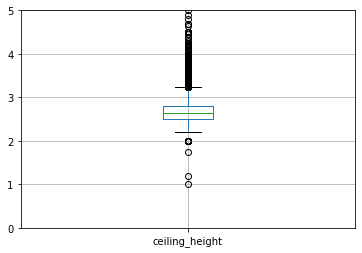

In [48]:
data_new.plot(kind='box',y='ceiling_height',grid=True,legend=True,ylim=(0,5));

Итак, у нас более 9000 пустых значений и 89 "странных". Мы не можем их совсем удалить из датафрейма, так как объявления с отсутствующими данными по потолкам могут понадобится нам для анализа других показателей. Но для анализа параметра именно "Высота потолка" нужны объявления с наличием высоты потолка. Поэтому для них создадим отдельную переменную, в которой оставим только корректные значения потолока (удалим пропущенные и "странные").

In [49]:
#удалим пустые строки
good_ceiling_height=data_new[data_new['ceiling_height'].notna()]

In [50]:
#проверим, выполнено ли действие
good_ceiling_height['ceiling_height'].count()

14489

In [51]:
#удалим объяления с потолками меньше от 5 до 24 м
good_ceiling_height=data_new[(data_new['ceiling_height']>=2.5)&(data_new['ceiling_height']<=5)]

In [52]:
#проверим, выполнено ли действие
good_ceiling_height['ceiling_height'].count()

14400

In [53]:
#проверим, сохранены ли данные
good_ceiling_height['ceiling_height'].unique()

array([2.7 , 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 , 2.55,
       3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54,
       2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 3.6 , 2.92,
       3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96,
       5.  , 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 3.38,
       3.01, 3.65, 3.9 , 3.18, 3.35, 3.57, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26, 3.34,
       2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93, 3.46,
       3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04, 4.45,
       3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69, 3.31, 4.65,
       3.56, 3.51, 3.93, 3.42, 2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.29,
       3.76, 3.69, 2.89, 3.58, 4.9 , 3.48, 3.59])

**FLOORS TOTAL И FLOOR**

In [54]:
#изучим уникальные значения в столбце "Всего этажей"
data_new['floors_total'].sort_values().unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,   26,
   27,   28,   29,   33,   34,   35,   36,   37,   52,   60, <NA>]
Length: 37, dtype: Int64

In [55]:
#изучим уникальные значения в столбце "Этаж"
data_new['floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

На первый взгляд, аномалий нет, так как кол-во этажей в доме может быть любым, также, как и этаж, на котором размещена квартира.\
Попробуем сравнить этаж квартиры и общее кол-во этажей в доме: нет ли объявлений, где этаж квартиры больше кол-ва этажей в доме

In [56]:
len(data_new[data_new['floor']>data_new['floors_total']])

0

Таких объявлений нет.
Тогда сохраним в отдельную переменную только те строки из датафреймя, где указано общее кол-во этажей в доме для дальнейшего анализа по этажности (у нас 86 объявлений без указания этажности). Из общего дата фрейма удалять их не будем, так как они нужны нам для общего анализа.

In [57]:
good_floors_total=data_new[data_new['floors_total'].notna()]

In [58]:
#проверим, сохранилось ли изменение
good_floors_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  int64         
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        14480 non-null  float64       
 6   floors_total          23564 non-null  Int64         
 7   living_area           22137 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  bool          
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          22137 non-null  float64       
 13  balcony         

**BALCONY**

In [59]:
#посмотрим уникальные значения
data_new['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

В среднем, в квартирах 1-2 балкона. Квартиры с более чем 3мя балконами кажутся аномальными значениями. Посчитаем, сколько таких.

In [60]:
len(data_new[data_new['balcony']>=3])

566

566 квартир. Из выборки удалять мы их не будем, так как в этих квартирах могут содержаться другие важные для нас данные.

**TOTAL IMAGES**

В датафрейме есть объявления без фотографий. Посмотрим, сколько их

In [61]:
len(data_new[data_new['total_images']==0])

1057

In [62]:
data_new[data_new['total_images']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
62,0,4800000,78.60,2017-09-17,3,2.80,9,48.8,5,True,...,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
88,0,1700000,33.10,2019-04-09,1,NaN,5,18.4,1,True,...,6.40,0,Лебяжье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,0,3200000,32.00,2018-02-01,1,2.50,9,18.0,3,True,...,8.00,0,Санкт-Петербург,49587.0,16425.0,1.0,215.0,0.0,NaN,40.0
166,0,2300000,60.00,2017-12-02,2,NaN,3,NaN,1,True,...,NaN,0,Плодовое,NaN,NaN,NaN,NaN,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23602,0,8700000,73.00,2019-01-23,3,2.65,4,NaN,4,True,...,NaN,0,Санкт-Петербург,20415.0,2345.0,2.0,57.0,3.0,151.0,34.0
23606,0,2850000,68.00,2018-07-29,1,3.00,5,41.0,3,True,...,10.00,0,Санкт-Петербург,38473.0,7740.0,2.0,560.0,3.0,327.0,4.0
23624,0,2800000,38.50,2018-02-22,1,2.60,7,19.0,6,True,...,8.50,0,Кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,59.0
23662,0,6151120,66.86,2017-12-15,2,2.70,18,32.9,7,True,...,11.44,2,Санкт-Петербург,18396.0,16275.0,1.0,684.0,1.0,861.0,203.0


1057 объявлений без фото. Вряд ли такие объявления могут кого-то заинтересовать. Но тем не менее, они могут сожержать в себе другие данные, которые нужны нам для анализа. Поэтому сохраним в отдельный датафрейм, из которого исключены объявления без фотографий.

In [63]:
good_total_images=data_new[data_new['total_images']!=0]

In [64]:
#проверим
good_total_images['total_images'].count()

22592

А в общем датафрейме отметим их - создадим доп столбец и внесем комментарий "no photo". Возможно, нам понадобятся эти данные

In [65]:
pd.set_option('mode.chained_assignment', None)
data_new['comment']=''

In [66]:
data_new.loc[data_new['total_images']==0,'comment']='nophoto'

In [67]:
#проверим
data_new[data_new['total_images']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,comment
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,nophoto
62,0,4800000,78.60,2017-09-17,3,2.80,9,48.8,5,True,...,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0,nophoto
88,0,1700000,33.10,2019-04-09,1,NaN,5,18.4,1,True,...,0,Лебяжье,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nophoto
129,0,3200000,32.00,2018-02-01,1,2.50,9,18.0,3,True,...,0,Санкт-Петербург,49587.0,16425.0,1.0,215.0,0.0,NaN,40.0,nophoto
166,0,2300000,60.00,2017-12-02,2,NaN,3,NaN,1,True,...,0,Плодовое,NaN,NaN,NaN,NaN,NaN,NaN,45.0,nophoto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23602,0,8700000,73.00,2019-01-23,3,2.65,4,NaN,4,True,...,0,Санкт-Петербург,20415.0,2345.0,2.0,57.0,3.0,151.0,34.0,nophoto
23606,0,2850000,68.00,2018-07-29,1,3.00,5,41.0,3,True,...,0,Санкт-Петербург,38473.0,7740.0,2.0,560.0,3.0,327.0,4.0,nophoto
23624,0,2800000,38.50,2018-02-22,1,2.60,7,19.0,6,True,...,0,Кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,59.0,nophoto
23662,0,6151120,66.86,2017-12-15,2,2.70,18,32.9,7,True,...,2,Санкт-Петербург,18396.0,16275.0,1.0,684.0,1.0,861.0,203.0,nophoto


**КАРТОГРАФИЧЕСКИЕ ДАННЫЕ**

In [68]:
#опишем столбец с расстоянием до центра
data_new['cityCenters_nearest'].describe()

count    18138.000000
mean     14198.186845
std       8606.955501
min        181.000000
25%       9241.000000
50%      13106.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [69]:
#опишем столбец с расстоянием до парка
data_new['parks_nearest'].describe()

count    8063.000000
mean      490.863946
std       342.562642
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [70]:
#опишем столбец с расстоянием до аэропорта
data_new['airports_nearest'].describe()

count    18115.000000
mean     28802.885840
std      12637.580088
min          0.000000
25%      18575.500000
50%      26756.000000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [71]:
#есть квартира, где не указано расстояние до аэропорта, посмотрим на нее
data_new[data_new['airports_nearest']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,comment
21085,0,7000000,34.7,2018-09-23,1,2.7,9,19.8,3,True,...,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,nophoto


В картографических данных (расстояние до аэропорта, до центра, до парка) на первый взгляд аномалий нет, расстояние может быть любым. Но в картографических данных есть много пропусков. Удалять из общего датафрейма строки с пропусками мы не можем - их удаление повлияет на общий анализ, так как это большая выборка. Но для анализа картографических параметров пустые объявления не информативны. Поэтому также создадим отдельные датафреймы, из которых исключим все объявления, в которых не указано расстояние

In [72]:
#удалим объявления, где не указано расстояние до центра
good_cityCenters_nearest=data_new[data_new['cityCenters_nearest'].notna()]

In [73]:
good_cityCenters_nearest.shape

(18138, 23)

In [74]:
#удалим объявления, где не указано расстояние до аэропорта
good_airports_nearest=data_new[data_new['airports_nearest'].notna()]

In [75]:
good_airports_nearest.shape

(18115, 23)

In [76]:
#удалим объявления, где не указано расстояние до парка
good_parks_nearest=data_new[data_new['parks_nearest'].notna()]

In [77]:
good_parks_nearest.shape

(8063, 23)

**KITCHEN И LIVING AREA**

In [78]:
#опишем столбец "Площадь кухни"
data_new['kitchen_area'].describe()

count    22189.000000
mean        10.859249
std          6.797880
min          0.000000
25%          7.000000
50%          9.300000
75%         12.000000
max        230.000000
Name: kitchen_area, dtype: float64

In [79]:
#есть объявления, где площадь кухни=0. Посмотрим на них
data_new[data_new['kitchen_area']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,comment
9861,10,2350000,25.0,2017-12-03,0,NaN,22,25.0,17,True,...,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,13.0,
12691,1,3700000,24.2,2017-11-10,0,NaN,19,24.2,13,True,...,1,Санкт-Петербург,17837.0,16840.0,0.0,NaN,2.0,210.0,74.0,


In [80]:
#опишем столбец "Жилая площадь"
data_new['living_area'].describe()

count    22189.000000
mean        34.897529
std         23.117240
min          2.000000
25%         18.800000
50%         30.000000
75%         42.800000
max        571.000000
Name: living_area, dtype: float64

Проверим, нет ли таких объявлений, где площадь кухни или жилая площадь больше общей площади жилья

In [81]:
len(data_new[data_new['living_area']>data_new['total_area']])

0

In [82]:
len(data_new[data_new['kitchen_area']>data_new['total_area']])

0

Итак, явных аномалий в жилой площади и площади кухни не видно, так как площадь может быть любая.\
Но мы выяснили, что есть 2 квартиралы с площадью кухни 0 ква м. Также ранее мы выяснили, что осталось 1460 объявлений, где не указана площадь кухни и жилая площадь.\
Удалять из датафрейма мы их не будем, так как они нужны нам для анализа других показателей, но для анализа именно параметров площади кухни и жилой площади такие объявления неинформативны. Поэтому сохраним в отдельную переменную датафрейм без пустых значений и без площади кухни 0 кв м.

In [83]:
good_living_area=data_new[data_new['living_area'].notna()]

In [84]:
#проверим, выполнилось ли условие
len(good_living_area[good_living_area['living_area'].isna()])

0

In [85]:
good_kitchen_area=data_new[(data_new['kitchen_area'].notna())&(data_new['kitchen_area']!=0)]

In [86]:
#проверим, выполнилось ли условие
len(good_kitchen_area[good_kitchen_area['kitchen_area'].isna()])

0

**ROOMS**

In [87]:
#опишем столбец
data_new['rooms'].describe()

count    23649.000000
mean         2.070151
std          1.078621
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

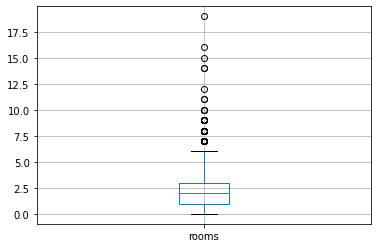

In [88]:
#построим диаграмму размаха
data_new.boxplot(column='rooms')

Судя по графику, нормальное кол-во комнат - от 1 до 5.\
Максимальное кол-во комнат - 19, что, конечно, маловероятно, но может быть, если слишком большая площадь. Посмотрим, сколько таких квартир с больши кол-вом комнат

In [89]:
data_new[data_new['rooms']>7]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,comment
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,True,...,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,
813,7,16500000,229.0,2016-02-25,8,NaN,6,160.0,5,True,...,0,Санкт-Петербург,23968.0,4536.0,1.0,243.0,0.0,NaN,806.0,
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,True,...,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,
4149,6,23000000,272.6,2018-01-11,10,3.14,7,145.9,7,True,...,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN,
4435,13,22190000,191.2,2017-12-05,8,2.90,6,115.8,1,True,...,0,Санкт-Петербург,21589.0,1152.0,1.0,587.0,2.0,155.0,115.0,
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,True,...,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,
7857,11,150000000,230.0,2017-10-25,8,NaN,8,220.0,8,True,...,0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,135.0,
8758,5,16100000,150.0,2018-07-10,8,2.92,5,107.0,1,True,...,0,Санкт-Петербург,26080.0,4782.0,2.0,473.0,0.0,NaN,NaN,
8822,14,49968900,398.0,2017-07-12,9,3.00,2,160.1,1,False,...,0,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,471.0,
8860,12,17000000,235.0,2018-07-14,9,3.00,6,NaN,3,True,...,0,Санкт-Петербург,24466.0,5034.0,1.0,346.0,0.0,NaN,90.0,


31 квартира. В целом, площадь квартир большая, и такое кол-во может быть. Но на всякий случай сохраним в отдельную переменную дата фрейм без таких квартир с больши кол-вом комнат, чтобы выборка была однородной.

In [90]:
good_rooms=data_new[data_new['rooms']<10]

In [91]:
#проверим, выполнилось ли сохранение
good_rooms.shape

(23638, 23)

**DAYS EXPOSITIONS**

In [92]:
#опишем столбец "Время размещения"
data_new['days_exposition'].describe()

count    20469.000000
mean       180.761102
std        219.780376
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Аномалий на первый взгляд нет. Время размещения может быть любым

**LAST PRICE**

In [93]:
data_new['last_price'].describe()

count    2.364900e+04
mean     6.540769e+06
std      1.089649e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Значения с столбце слишком большие, анализировать не очень удобно. Так как цена указан в млн, разделим указанную цену на 1млн, и сохраним данные в новом столбце

In [94]:
pd.set_option('mode.chained_assignment', None)
data_new['last_price_mln']=data_new['last_price']/1000000

In [95]:
#опишем новый столбец в млн
data_new['last_price_mln'].describe()

count    23649.000000
mean         6.540769
std         10.896491
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price_mln, dtype: float64

<AxesSubplot:>

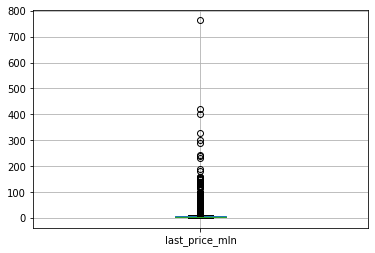

In [96]:
#построим диаграмму размаха по новым данным
data_new.plot(kind='box',y='last_price_mln',grid=True,legend=True)

Значения более 300 млн больше всех выделяются, посмотрим, что это за квартиры.

In [97]:
data_new[data_new['last_price_mln']>300]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,comment,last_price_mln
1436,19,330000000,190.0,2018-04-04,3,3.5,7,95.0,5,True,...,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,,330.0
12971,19,763000000,400.0,2017-09-30,7,NaN,10,250.0,10,True,...,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,,763.0
14706,15,401300000,401.0,2016-02-20,5,NaN,9,204.0,9,False,...,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,,401.3
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,True,...,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,,420.0


Самые дорогие квартиры находятся в Санкт-Петербурге, в самом центре. Несмотря на то, что на графике слишком высокая стоимость кажется аномальной, квартиры с большой площадью в центре города могут столько стоить. Поэтому удалать из общего дата фрейма не будем.

<AxesSubplot:>

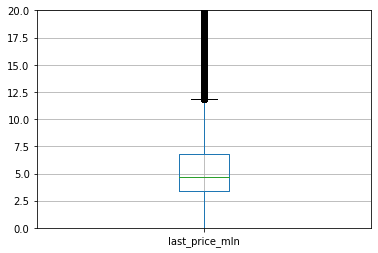

In [98]:
#построим график, увеличив масштаб
data_new.plot(kind='box',y='last_price_mln',grid=True,legend=True,ylim=(0,20))

Видно, что в среднем квартира стоит до 13 млн. Квартир стоимость более 13млн гораздо меньше.\
Квартиры с большой стоимостью выбиваются из общего диапозона, но пока делать какие-то выводы рано, нужно изучить общую площадь квартир-возможно, высокая цена обусловлена большой площадью.
Очевидно пока только одно аномальное значение - квартира стоимостью 12190р. Удалим ее из общего датафрейма.

In [99]:
data_new=data_new[data_new['last_price']>13000]

In [100]:
#проверим, выполнено ли изменение
data_new.shape

(23648, 24)

<AxesSubplot:ylabel='Frequency'>

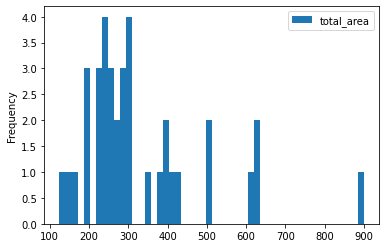

In [101]:
data_new[data_new['last_price_mln']>100].plot(y='total_area', kind='hist',bins=50)

Видно, что в целом высокую цену имеют квартыры с достаточно большой площадью. Но все равно какие-то выводы о возможных аномалиях сделать нельзя, пока мы не посчитаем цену за кв м. Сделаем это дальше.

**TOTAL AREA**

In [102]:
#опишем столбец с общей площадью квартиры
data_new['total_area'].describe()

count    23648.000000
mean        60.328505
std         35.661172
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

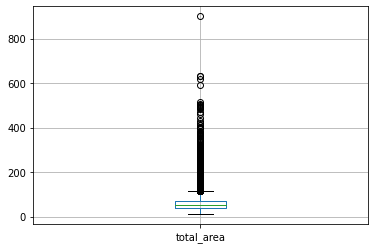

In [103]:
#построим диаграмму размаха
data_new.plot(kind='box',y='total_area',grid=True, legend=True)

Сильно выбивается из общего диапозона квартира плошадью более 800 кв м. Посмотрим, что это за квартиры.

In [104]:
data_new[data_new['total_area']>800]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,comment,last_price_mln
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,True,...,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,,420.0


In [105]:
data_new[data_new['total_area']>400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,comment,last_price_mln
660,3,49950000,483.90,2017-10-04,7,3.20,6,312.50,4,True,...,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0,,49.950000
3117,19,140000000,631.00,2019-03-30,7,NaN,5,571.00,5,True,...,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,,140.000000
3676,12,28789000,441.98,2019-01-23,4,NaN,6,406.93,6,True,...,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN,,28.789000
4237,1,50000000,517.00,2017-10-14,7,NaN,4,332.00,3,True,...,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN,,50.000000
5358,20,65000000,590.00,2019-02-14,15,3.50,6,409.00,3,True,...,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,,65.000000
5893,3,230000000,500.00,2017-05-31,6,NaN,7,460.00,7,True,...,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0,,230.000000
6221,8,34000000,470.30,2018-01-14,4,NaN,3,248.70,3,True,...,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0,,34.000000
6621,20,99000000,488.00,2017-04-09,5,2.95,20,216.00,17,True,...,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.0,,99.000000
8018,20,84000000,507.00,2015-12-17,5,4.45,7,301.50,7,True,...,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0,,84.000000
9826,1,43185328,494.10,2017-05-12,1,2.85,12,NaN,3,True,...,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0,,43.185328


В целом, высокую стоимость имеют квартиры с блльшой стоимостью, что логично.

<AxesSubplot:>

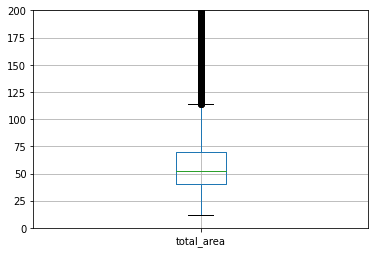

In [106]:
data_new.plot(kind='box',y='total_area',grid=True, legend=True,ylim=(0,200))

Структура графика похожа на графики по стоимости жилья. Средняя площадь жилья-50 кв м. Квартиры более 110 кв м встречаются реже.\
По прежнему делать какие-то выводы сложно, нужно посчитать цену за кв м, тогда будут видны возможные аномалии.

<div class="alert alert-info"> <b>Комментарии студента:</b> Напишем вывод после раздела</div>

**ВЫВОД:**\
В проанализированном датафрейме имелись пропущенные значения, некорректные типы данных, неявные дубликаты, ошибочные значения в данных.

В рамках блока по предобработке данных выполнена проверка всех столбцов на предмет наличия пропусков, дубликатов, аномалий.

**Работа с пропусками**\
Удалены 49 объявлений без указания населенного пункта\
11519 пустых значений по с кол-вом балконов заменено на 0\
Восстановлена часть значений с площадью кухни и жилой площадью\
Восстановлено 20924 значений в столбце is apartment\
**Изменение типов данных**\
Изменены типы данных в  5 столбцах (день размещения, апартаменты, этаж, кол-во балконов, цена)\
**Дубликаты**\
Выполнена проверка на наличие дубликатов, выполнена замена неявных дубликатов – в списке остались только названия населенного пункта без указания его типа (поселок, деревня и тп)\
**Аномалии**\
Удалены аномальные значения в данных по потолкам (89 «странных» значений)\
Созданые отдельные переменные по исследуемым параметрам, где сохранены только "чистые" данные: без странных значений и пропусков


Итак, пропущенные значения, были частично заменены, тип данных исправлен, дубликаты обработаны и удалены, ошибочные значения восстановлены и частично проработаны, удалены объявления без населенных пунктов.


### Посчитайте и добавьте в таблицу новые столбцы

3.1 Добавим столбец - **цена за 1кв м**

In [107]:
#добавим столбец, внесем значения
pd.set_option('mode.chained_assignment', None)
data_new['price_for_meter']=data_new['last_price']/data_new['total_area']

In [108]:
#округлим значения
pd.set_option('mode.chained_assignment', None)
data_new['price_for_meter']=data_new['price_for_meter'].round()

In [109]:
#отсортируем по убыванию по цене за кв м, сохранив в отдельную переменную
sort_price_for_meter=data_new.sort_values(by='price_for_meter',ascending=False)

In [110]:
#ознакомимся со значениями - выведем на экран несколько столбцов, отсортированных по цене за кв м
sort_price_for_meter[['locality_name','total_area','last_price','price_for_meter']]

,locality_name,total_area,last_price,price_for_meter
12971,Санкт-Петербург,400.0,763000000,1907500.0
1436,Санкт-Петербург,190.0,330000000,1736842.0
22831,Санкт-Петербург,187.5,289238400,1542605.0
14706,Санкт-Петербург,401.0,401300000,1000748.0
4996,Санкт-Петербург,124.5,124000000,995984.0
...,...,...,...,...
23477,Гатчина,138.0,1450000,10507.0
9581,Старополье,43.4,450000,10369.0
11351,Сланцы,54.0,550000,10185.0
4405,Сланцы,52.0,500000,9615.0


In [111]:
#опишем данные столбца
data_new['price_for_meter'].describe()

count    2.364800e+04
mean     9.941528e+04
std      5.023055e+04
min      7.963000e+03
25%      7.661900e+04
50%      9.500000e+04
75%      1.142680e+05
max      1.907500e+06
Name: price_for_meter, dtype: float64

<AxesSubplot:>

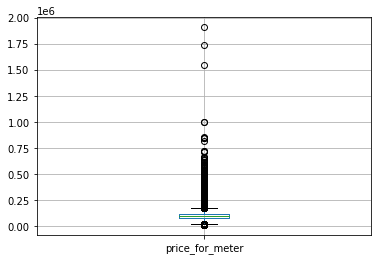

In [112]:
#построим диаграмму размаха
data_new.boxplot(column='price_for_meter')

Минимальная цена за кв м - 7 963р. Максимальная - 1 907 500р (это кажется аномальным значением, но мы ранее выяснили, что в датафрейме есть большие квартиры, которые и имеют очень высокую стоимость, и, соответственно, стоимость за 1 кв м.)

Построим диаграмму рассеивания, чтобы посмотреть, как общая площадь коррелирует с ценой за кв м.

<AxesSubplot:xlabel='price_for_meter', ylabel='total_area'>

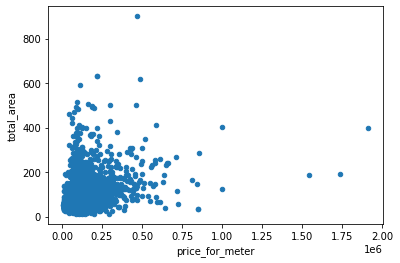

In [113]:
data_new.plot(kind='scatter',y='total_area',x='price_for_meter')

<AxesSubplot:xlabel='price_for_meter', ylabel='total_area'>

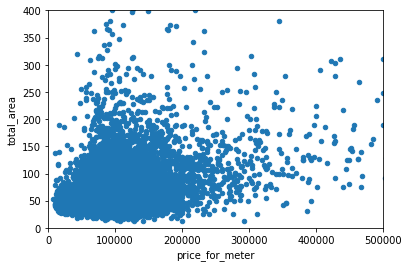

In [114]:
#Увеличим зону с максимальным скоплением "точек", чтобы рассмотреть детальнее
data_new.plot(kind='scatter',y='total_area',x='price_for_meter',ylim=(0,400),xlim=(0,500000))

Значения (точки), где цена за кв м увеличивается пропорционально стоимости, кажутся логичными: чем больше плошадь, тем выше цена за кв м. Но также мы видим зоны, где при маленькой площади жилье имее высокую цену за кв м, и наоборот: при большой площади жилья слишком низкая цена за кв м. Это "странные" объявления. Их мы проанализируем в блоке 4 - исследовательский анализ данных.

<AxesSubplot:xlabel='price_for_meter', ylabel='total_area'>

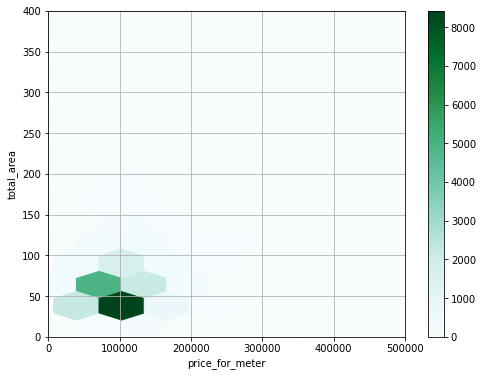

In [115]:
data_new.plot(kind='hexbin',gridsize=30,sharex=False,grid=True,figsize=(8,6),y='total_area',x='price_for_meter',ylim=(0,400),xlim=(0,500000))

3.2 Добавим 3 столбца: **день недели, месяц, год** публикации объявления

In [116]:
#добавим день недели публикаци объявления
pd.set_option('mode.chained_assignment', None)
data_new['weekday_exposition']=data_new['first_day_exposition'].dt.weekday

In [117]:
#добавим месяц публикаци объявления
pd.set_option('mode.chained_assignment', None)
data_new['month_exposition']=data_new['first_day_exposition'].dt.month

In [118]:
#добавим год публикаци объявления
pd.set_option('mode.chained_assignment', None)
data_new['year_exposition']=data_new['first_day_exposition'].dt.year

In [119]:
#проверим, внесены ли изменения
data_new

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,comment,last_price_mln,price_for_meter,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,482.0,2.0,755.0,NaN,,13.000,120370.0,3,3,2019
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,NaN,0.0,NaN,81.0,,3.350,82921.0,1,12,2018
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,90.0,2.0,574.0,558.0,,5.196,92786.0,3,8,2015
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,84.0,3.0,234.0,424.0,nophoto,64.900,408176.0,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,112.0,1.0,48.0,121.0,,10.000,100000.0,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,True,...,796.0,3.0,381.0,NaN,,9.700,72491.0,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.00,4,True,...,NaN,NaN,NaN,45.0,,3.100,52542.0,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,True,...,NaN,NaN,NaN,NaN,,2.500,44092.0,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17,53.45,12,True,...,173.0,3.0,196.0,602.0,,11.475,149511.0,1,3,2017


In [120]:
#проверим, везде ли заполнены данные
data_new[data_new['first_day_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,comment,last_price_mln,price_for_meter,weekday_exposition,month_exposition,year_exposition


3.3 Добавим **тип этажа квартиры**

In [121]:
#создадим новый столбец
pd.set_option('mode.chained_assignment', None)
data_new['floor_type']=" "

In [122]:
#укажем, что этаж первый, или в столбце этаж указано 1
pd.set_option('mode.chained_assignment', None)
data_new.loc[data_new['floor']==1, 'floor_type']="первый"

In [123]:
#укажем, что этаж последний, или столбец этаж равен общему кол-ву этажей в доме
pd.set_option('mode.chained_assignment', None)
data_new.loc[data_new['floor']==data_new['floors_total'], 'floor_type']="последний"

In [124]:
#укажем, что этаж другой, если он не первый и не последний
pd.set_option('mode.chained_assignment', None)
data_new.loc[(data_new['floor']!=data_new['floors_total'])&(data_new['floor']!=1),'floor_type']="другой"

In [125]:
#проверим,выполнилось ли изменение
data_new

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,comment,last_price_mln,price_for_meter,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,2.0,755.0,NaN,,13.000,120370.0,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,...,0.0,NaN,81.0,,3.350,82921.0,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,...,2.0,574.0,558.0,,5.196,92786.0,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,3.0,234.0,424.0,nophoto,64.900,408176.0,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1.0,48.0,121.0,,10.000,100000.0,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,True,...,3.0,381.0,NaN,,9.700,72491.0,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.00,4,True,...,NaN,NaN,45.0,,3.100,52542.0,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.70,1,True,...,NaN,NaN,NaN,,2.500,44092.0,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17,53.45,12,True,...,3.0,196.0,602.0,,11.475,149511.0,1,3,2017,другой


In [126]:
#проверим,выполнилось ли изменение
data_new[data_new['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,comment,last_price_mln,price_for_meter,weekday_exposition,month_exposition,year_exposition,floor_type
186,12,11640000,65.2,2018-10-02,2,NaN,<NA>,30.80,4,True,...,0.0,NaN,49.0,,11.640000,178528.0,1,10,2018,
237,4,2438033,28.1,2016-11-23,1,NaN,<NA>,20.75,1,True,...,1.0,374.0,251.0,,2.438033,86763.0,2,11,2016,первый
457,4,9788348,70.8,2015-08-01,2,NaN,<NA>,38.40,12,True,...,2.0,706.0,727.0,,9.788348,138254.0,5,8,2015,
671,4,6051191,93.6,2017-04-06,3,NaN,<NA>,47.10,8,True,...,1.0,374.0,123.0,,6.051191,64649.0,3,4,2017,
1757,5,3600000,39.0,2017-04-22,1,NaN,<NA>,NaN,9,True,...,1.0,652.0,77.0,,3.600000,92308.0,5,4,2017,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.8,<NA>,NaN,3,True,...,1.0,853.0,512.0,,8.500000,133858.0,2,5,2017,
22656,4,4574160,64.5,2017-04-02,2,NaN,<NA>,31.70,20,True,...,1.0,374.0,127.0,,4.574160,70917.0,6,4,2017,
22808,0,14569263,110.4,2016-11-20,3,NaN,<NA>,45.38,6,True,...,0.0,NaN,260.0,nophoto,14.569263,131968.0,6,11,2016,
23590,0,21187872,123.3,2017-04-25,3,NaN,<NA>,50.40,18,True,...,0.0,NaN,104.0,nophoto,21.187872,171840.0,1,4,2017,


Осталось 85 строк без типа этажа, так как там по этим объявлениям в датафрейме изначально не было указано общее кол-во этажей в доме

3.4 Добавим столбец с **расстоянием до центра города в километрах**

In [127]:
#создадим новый столбец, добавим значение в км и округлим
pd.set_option('mode.chained_assignment', None)
data_new['cityCenters_nearest_km']=(data_new['cityCenters_nearest']/1000).round()

In [128]:
#проверим изменение
data_new[['cityCenters_nearest','cityCenters_nearest_km']]

,cityCenters_nearest,cityCenters_nearest_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,6800.0,7.0
4,8098.0,8.0
...,...,...
23694,4232.0,4.0
23695,NaN,NaN
23696,NaN,NaN
23697,10364.0,10.0


<div class="alert alert-info"> <b>Комментарии студента:</b> Напишем вывод после раздела</div>


**ВЫВОД:**\
В соответствии с задачей в датафрейм добавлены 6 новых столбцов

### Проведите исследовательский анализ данных

**4.1 ИЗУЧИТЕ СЛЕДУЮЩИЕ ПАРАМЕТРЫ ОБЪЕКТОВ**

По площади объектов и цене существует очень большой разброс, +ранее мы выясниили, что есть "странные" квартиры, где при маленькой площади жилье имее высокую цену за кв м, и наоборот: при большой площади жилья слишком низкая цена за кв м.\
Чтобы более глубоко проанализировать параматеры площади, цены, цены за кв м, и, возможно, исключить из датафрейма "странные" квартиры, целесообразно разделить массив на категории в срезах: эконом жилье, бюджетное жилье, элитное жилье.\
Также логично разделить объекты на 2 категории по типу локации (Санкт-Петербург и Ленинградская область),так как стоимость жилья и его параметры в городе и в области как правило сильно различаются.\

То есть мы хотим получить срезы:\
Санкт-Петербург: эконом, бюджет, элитное\
Ленинградская область: эконом, бюджет, элитное

In [129]:
#добавим в таблицу новый столбец, где укажем тип локации: Санкт-Петербург или Ленинградская область
pd.set_option('mode.chained_assignment', None)
data_new['location']=' '
data_new.loc[data_new['locality_name']=='Санкт-Петербург','location']='Санкт-Петербург'
data_new.loc[data_new['locality_name']!='Санкт-Петербург','location']='Ленинградская область'

In [130]:
#проверим, везде ли заполнились значения
data_new[data_new['location']==" "]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,comment,last_price_mln,price_for_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km,location


In [131]:
#проверим выборочно
data_new[['locality_name','location']]

,locality_name,location
0,Санкт-Петербург,Санкт-Петербург
1,Шушары,Ленинградская область
2,Санкт-Петербург,Санкт-Петербург
3,Санкт-Петербург,Санкт-Петербург
4,Санкт-Петербург,Санкт-Петербург
...,...,...
23694,Санкт-Петербург,Санкт-Петербург
23695,Тосно,Ленинградская область
23696,Рождествено,Ленинградская область
23697,Санкт-Петербург,Санкт-Петербург


In [132]:
#добавим в таблицу новый столбец, где укажем ценовой сегмент

In [133]:
#добавим в таблицу новый столбец, где укажем ценовой сегмент
pd.set_option('mode.chained_assignment', None)
data_new['price_segment']=''

Согласно открытым рыночным данным, цена за кв м и площадь жилья следующая:\
**Санкт-Петербург:**\
low - 45 000-95 000 р за кв м\
medium - 95 000-110 000 р за кв м\
premium - 110 000 и более р за кв м

**Ленинградская область:**\
low - 10 000-65 000 р за кв м\
medium - 65 000-80 000 р за кв м\
premium - 80 000 и более р за кв м

**Площадь**:\
low - 28-50 кв м\
medium - 50-100 кв м\
premium - 100 и более кв м

In [134]:
#data_new[data_new['total_area']<15]

Разобьем датафрейм на сегменты согласно условиям выше.\
Только нижнюю ценовую границу для Ленинградской области устанавливать не будем, так как мы можем допустить, что квартира может находиться в очень отдаленном районе, иметь очень маленькую площадь и соответствующую низкую цену.

Также не будем задавать нижнюю границу по площади ни в Санкт-Петербурге, ни в Лен области, так как студия, например, может иметь очень маленькую площадь (например, как в нашем датафрейме - минимальная 12 м)

In [135]:
#Санкт_Петербург, low
data_new.loc[(data_new['location']=="Санкт-Петербург")&(data_new['price_for_meter']>45000)&(data_new['price_for_meter']<95000)&(data_new['total_area']>0)&(data_new['total_area']<50), 'price_segment']="low"

In [136]:
#Санкт_Петербург, medium
data_new.loc[(data_new['location']=="Санкт-Петербург")&(data_new['price_for_meter']>=95000)&(data_new['price_for_meter']<110000)&(data_new['total_area']>=40)&(data_new['total_area']<100), 'price_segment']="medium"

In [137]:
#Санкт_Петербург, premium
data_new.loc[(data_new['location']=="Санкт-Петербург")&(data_new['price_for_meter']>=110000)&(data_new['total_area']>=60), 'price_segment']="premium"

In [138]:
#Ленинградская область, low
data_new.loc[(data_new['location']=="Ленинградская область")&(data_new['price_for_meter']>0)&(data_new['price_for_meter']<65000)&(data_new['total_area']>0)&(data_new['total_area']<50), 'price_segment']="low"

In [139]:
#Ленинградская область, medium
data_new.loc[(data_new['location']=="Ленинградская область")&(data_new['price_for_meter']>=65000)&(data_new['price_for_meter']<80000)&(data_new['total_area']>=40)&(data_new['total_area']<100), 'price_segment']="medium"

In [140]:
#Ленинградская область, premium
data_new.loc[(data_new['location']=="Ленинградская область")&(data_new['price_for_meter']>=80000)&(data_new['total_area']>=60), 'price_segment']="premium"

In [141]:
#проверим, во всех ли строках заполнен сегмент. Сохраним его в отдельную переменную
price_for_meter_strange=data_new[data_new['price_segment']==""]

In [142]:
price_for_meter_strange.sort_values(by='price_for_meter')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,comment,last_price_mln,price_for_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km,location,price_segment
14911,5,430000,54.00,2018-06-26,2,NaN,3,NaN,3,True,...,,0.4300,7963.0,1,6,2018,последний,NaN,Ленинградская область,
4405,9,500000,52.00,2018-08-02,2,2.70,2,31.00,1,True,...,,0.5000,9615.0,3,8,2018,первый,NaN,Ленинградская область,
11351,17,550000,54.00,2019-02-07,2,3.00,2,40.00,1,True,...,,0.5500,10185.0,3,2,2019,первый,NaN,Ленинградская область,
23477,3,1450000,138.00,2018-07-06,3,NaN,2,58.00,2,True,...,,1.4500,10507.0,4,7,2018,последний,NaN,Ленинградская область,
19460,13,560000,52.00,2017-11-21,2,3.00,3,30.00,3,True,...,,0.5600,10769.0,1,11,2017,последний,NaN,Ленинградская область,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,9,19500000,49.70,2017-06-08,1,3.80,10,NaN,8,False,...,,19.5000,392354.0,3,6,2017,другой,5.0,Санкт-Петербург,
21238,1,24412900,38.12,2018-06-27,1,NaN,10,16.83,4,False,...,,24.4129,640422.0,2,6,2018,другой,NaN,Ленинградская область,
8322,20,39900000,55.30,2017-10-26,1,3.05,6,35.00,4,True,...,,39.9000,721519.0,3,10,2017,другой,2.0,Санкт-Петербург,
17172,14,28000000,33.00,2019-04-30,1,3.50,5,NaN,2,True,...,,28.0000,848485.0,1,4,2019,другой,1.0,Санкт-Петербург,


Осталось 12 480 объявлений (около 50% данных), которые не подошли ни под одну категорию.\
Посмотрим эти объявления в разбивке по локации отдельно

In [143]:
#сохраним в отдельную переменную данные по Санкт-Петербургу, отсортированные по цене за кв м
spb=price_for_meter_strange[['total_area','price_for_meter','location']].sort_values(by='price_for_meter')

In [144]:
#выведем первые 40 значений с минимальной ценой за кв м
spb[spb['location']=='Санкт-Петербург'].head(40)

,total_area,price_for_meter,location
17753,117.30,15345.0,Санкт-Петербург
19952,138.70,15862.0,Санкт-Петербург
21338,190.00,16842.0,Санкт-Петербург
23394,92.00,17391.0,Санкт-Петербург
4248,49.10,24440.0,Санкт-Петербург
13739,80.00,26250.0,Санкт-Петербург
7756,151.80,28920.0,Санкт-Петербург
2520,65.00,35385.0,Санкт-Петербург
3325,94.00,37234.0,Санкт-Петербург
8646,94.00,37234.0,Санкт-Петербург


In [145]:
#выведем последний 40 значений с максимальной ценой за кв м
spb[spb['location']=='Санкт-Петербург'].tail(40)

,total_area,price_for_meter,location
7858,45.1,219512.0,Санкт-Петербург
11004,47.0,221277.0,Санкт-Петербург
3044,51.0,221569.0,Санкт-Петербург
21854,33.7,222552.0,Санкт-Петербург
4097,44.0,222727.0,Санкт-Петербург
4074,56.6,225265.0,Санкт-Петербург
2688,45.7,227571.0,Санкт-Петербург
11022,56.0,230357.0,Санкт-Петербург
8788,34.0,230882.0,Санкт-Петербург
16664,25.0,231960.0,Санкт-Петербург


Мы видим "странные" квартиры, которые, как раз, видели ранее на диаграмме рассеивания.\
Квартиры с низкой ценой за кв м, но с большой площадью. Например:\
17753	117.30	15345.0	Санкт-Петербург\
19952	138.70	15862.0	Санкт-Петербург\
21338	190.00	16842.0	Санкт-Петербург\
Такое вряд ли возможно, так как это сильно ниже рыночной цены.

И наоборот:
квартиры в очень высокой ценой за кв м, и с очень маленькой площадью. Например последние значения:\
8322	55.3	721519.0	Санкт-Петербург\
4859	33.0	848485.0	Санкт-Петербург\
17172	33.0	848485.0	Санкт-Петербург


Согласно открытым рыночным данным, минимальная рыночная цена за кв м в Санкт-Петербурге - 65 000 р за кв м (за небольшую площадь). Предположим, что есть срочные продажи с дисконтом до 30%. Тогда минимальная цена за кв м не может составлять менее 50 000р за кв м. А у нас такие объявления есть, да еще и с большой площадью.\
Целесообразно удалить объявления менее 50 000 р за кв м и площадью более 50 кв м из датафрейма и не брать их в расчет при анализе.\
Также маленькие квартиры с очень большой стоимостью тоже не будем брать в расчет - это аномалия. Скорей всего, это какая-то ошибка.

In [146]:
#Посмотрим, сколько больших квартир со слишком низкой ценой за кв м
data_new[(data_new['location']=="Санкт-Петербург")&(data_new['total_area']>=50)&(data_new['price_for_meter']<=50000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,comment,last_price_mln,price_for_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km,location,price_segment
2489,9,12500000,255.0,2017-04-21,3,NaN,2,153.9,2,True,...,,12.50,49020.0,4,4,2017,последний,7.0,Санкт-Петербург,
2520,0,2300000,65.0,2017-01-24,3,NaN,5,35.0,1,True,...,nophoto,2.30,35385.0,1,1,2017,первый,15.0,Санкт-Петербург,
3325,0,3500000,94.0,2018-07-23,3,3.00,23,64.0,10,True,...,nophoto,3.50,37234.0,0,7,2018,другой,10.0,Санкт-Петербург,
4903,0,3500000,94.0,2018-07-24,3,2.80,23,64.0,10,True,...,nophoto,3.50,37234.0,1,7,2018,другой,13.0,Санкт-Петербург,
7756,1,4390000,151.8,2017-04-28,6,3.50,6,106.5,6,False,...,,4.39,28920.0,4,4,2017,последний,2.0,Санкт-Петербург,
8646,0,3500000,94.0,2018-07-27,3,2.70,23,64.0,10,True,...,nophoto,3.50,37234.0,4,7,2018,другой,6.0,Санкт-Петербург,
13739,19,2100000,80.0,2016-07-01,4,NaN,6,23.0,3,True,...,,2.10,26250.0,4,7,2016,другой,5.0,Санкт-Петербург,
15181,9,3000000,70.0,2016-03-10,3,2.60,5,40.0,1,False,...,,3.00,42857.0,3,3,2016,первый,19.0,Санкт-Петербург,
17753,12,1800000,117.3,2016-02-18,5,NaN,4,23.6,2,False,...,,1.80,15345.0,3,2,2016,другой,5.0,Санкт-Петербург,
19755,11,2080000,50.7,2017-07-20,2,2.56,14,30.6,8,True,...,,2.08,41026.0,3,7,2017,другой,23.0,Санкт-Петербург,


In [147]:
#уберем их из датафрейма
data_new=data_new[~((data_new['location']=="Санкт-Петербург")&(data_new['total_area']>=50)&(data_new['price_for_meter']<=50000))]
data_new=data_new[~((data_new['location']=="Санкт-Петербург")&(data_new['total_area']<70)&(data_new['price_for_meter']>700000))]

In [148]:
#проверим, выполнено ли изменение
data_new.shape

(23630, 32)

In [149]:
#сохраним в отдельную переменную данные по Лен области, отсортированные по цене за кв м
lenobl=price_for_meter_strange[['total_area','price_for_meter','location','locality_name']].sort_values(by='price_for_meter')

In [150]:
#выведем первые 40 значений с минимальной ценой за кв м
lenobl[lenobl['location']=='Ленинградская область'].head(40)

,total_area,price_for_meter,location,locality_name
14911,54.0,7963.0,Ленинградская область,Свирь
4405,52.0,9615.0,Ленинградская область,Сланцы
11351,54.0,10185.0,Ленинградская область,Сланцы
23477,138.0,10507.0,Ленинградская область,Гатчина
19460,52.0,10769.0,Ленинградская область,Сланцы
9471,78.0,10897.0,Ленинградская область,Гатчина
15969,54.0,10926.0,Ленинградская область,Сланцы
16444,88.0,11250.0,Ленинградская область,Оредеж
10595,63.0,11587.0,Ленинградская область,Сланцы
22549,59.0,12542.0,Ленинградская область,Сланцы


In [151]:
#выведем последние 40 значений с максимальной ценой за кв м
lenobl[lenobl['location']=='Ленинградская область'].tail(40)

,total_area,price_for_meter,location,locality_name
12040,15.00,126667.0,Ленинградская область,СосновыйБор
13778,31.50,126667.0,Ленинградская область,Шушары
5274,43.00,126744.0,Ленинградская область,Сестрорецк
3400,44.00,127045.0,Ленинградская область,Пушкин
2165,25.00,127200.0,Ленинградская область,Мурино
23269,57.80,128028.0,Ленинградская область,Сестрорецк
22384,22.23,128205.0,Ленинградская область,Кудрово
16625,53.40,129213.0,Ленинградская область,Сестрорецк
22704,34.80,129310.0,Ленинградская область,Парголово
22873,52.40,129771.0,Ленинградская область,Пушкин


По Лен области мы также видим "странные" квартиры\
Квартиры с низкой ценой за кв м, но с большой площадью. Например:\
23477	138.0	10507.0	Ленинградская область	Гатчина\
16444	88.0	11250.0	Ленинградская область	Оредеж\
4659	115.0	14348.0	Ленинградская область	Сланцы\
Такое вряд ли возможно, так как это сильно ниже рынка.

И наоборот:
квартиры в очень высокой ценой за кв м, и маленькой площадь. Например:\
12040	15.00	126667.0	Ленинградская область	СосновыйБор\
13778	31.50	126667.0	Ленинградская область	Шушары\
2165	25.00	127200.0	Ленинградская область	Мурино\
22384	22.23	128205.0	Ленинградская область	Кудрово

Вряд ли квартира 15 кв м может стоить 126667 за кв м. Скорей всего, это какая-то ошибка

Согласно открытым рыночным данным, минимальная рыночная цена за кв м в Ленинградской области - от 10 000 р за кв м (за небольшую площадь в low сегменте от 28 до 50 м).\
А у нас есть объявления, где квартира площадью 138 кв м имеет стоимоть 10 000 р за кв м.\
Выдвенем гипотезу, что подобные объявления это ошибка.
Целесообразно удалить объявления менее 15 000 р за кв м и площадью более 70 кв м из датафрейма и не брать их в расчет при анализе, так как такие объявления маловероятны.\
Также маленькие квартиры с очень большой стоимостью тоже не будем брать в расчет - это аномалия. Скорей всего, это какая-то ошибка. Уберем из датафрейма квартиры, площадь которых менее 30 кв м, и стоимость более 100 000 р за кв м

In [152]:
#Посмотрим, сколько больших квартир со слишком низкой ценой за кв м
data_new[(data_new['location']=="Ленинградская область")&(data_new['total_area']>=70)&(data_new['price_for_meter']<=15000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,comment,last_price_mln,price_for_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km,location,price_segment
4659,1,1650000,115.0,2019-02-28,5,NaN,5,71.0,1,True,...,,1.65,14348.0,3,2,2019,первый,NaN,Ленинградская область,
9471,4,850000,78.0,2017-05-04,3,NaN,9,12.5,7,True,...,,0.85,10897.0,3,5,2017,другой,NaN,Ленинградская область,
16444,15,990000,88.0,2019-04-08,3,NaN,1,40.0,1,True,...,,0.99,11250.0,0,4,2019,последний,NaN,Ленинградская область,
19490,8,1200000,89.0,2017-07-08,4,3.0,2,60.3,2,True,...,,1.20,13483.0,5,7,2017,последний,NaN,Ленинградская область,
23477,3,1450000,138.0,2018-07-06,3,NaN,2,58.0,2,True,...,,1.45,10507.0,4,7,2018,последний,NaN,Ленинградская область,


In [153]:
#Посмотрим, сколько больших квартир со слишком низкой ценой за кв м
data_new[(data_new['location']=="Ленинградская область")&(data_new['total_area']<=30)&(data_new['price_for_meter']>=100000)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,comment,last_price_mln,price_for_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km,location,price_segment
556,0,3500000,28.5,2018-06-06,1,2.50,5,16.0,4,True,...,nophoto,3.500,122807.0,2,6,2018,другой,27.0,Ленинградская область,
697,12,2500000,24.1,2017-12-01,0,2.75,25,17.5,21,False,...,,2.500,103734.0,4,12,2017,другой,NaN,Ленинградская область,
804,7,2650000,26.5,2019-01-14,1,NaN,25,14.0,19,True,...,,2.650,100000.0,0,1,2019,другой,NaN,Ленинградская область,
1574,0,2200000,22.0,2017-11-03,0,NaN,18,15.0,16,True,...,nophoto,2.200,100000.0,4,11,2017,другой,NaN,Ленинградская область,
1655,1,2350000,22.0,2019-04-08,1,2.50,12,14.5,10,True,...,,2.350,106818.0,0,4,2019,другой,34.0,Ленинградская область,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23097,7,3100000,26.0,2018-06-22,1,NaN,25,15.1,16,True,...,,3.100,119231.0,4,6,2018,другой,NaN,Ленинградская область,
23191,3,1900000,18.9,2016-04-04,1,NaN,16,16.0,12,True,...,,1.900,100529.0,0,4,2016,другой,NaN,Ленинградская область,
23420,1,3345000,29.9,2018-08-09,1,NaN,27,20.3,3,True,...,,3.345,111873.0,3,8,2018,другой,19.0,Ленинградская область,
23530,0,3000000,30.0,2018-03-28,1,2.55,5,NaN,3,True,...,nophoto,3.000,100000.0,2,3,2018,другой,NaN,Ленинградская область,


In [154]:
#уберем их из датафрейма
data_new=data_new[~((data_new['location']=="Ленинградская область")&(data_new['total_area']>=70)&(data_new['price_for_meter']<=15000))]
data_new=data_new[~((data_new['location']=="Ленинградская область")&(data_new['total_area']<=30)&(data_new['price_for_meter']>=100000))]

In [155]:
data_new.shape

(23532, 32)

Комментарий: как упомянали ранее, далее при построении гистограмм по разным параметрам, мы будем обращаться к переменным с "чистыми" данными: переменные, начинающиеся со слова good.., которые мы создавали на этапе предобработки данных. Мы сохраняли в них только "чистые" данные: без пропусков, странных и аномальных значений, объявления, где есть полная информация по исследуемому нами параметру.

**ЦЕНА ЗА КВАДРАТНЫЙ МЕТР**

In [156]:
data_new['price_for_meter'].describe()

count    2.353200e+04
mean     9.934763e+04
std      4.966003e+04
min      7.963000e+03
25%      7.656200e+04
50%      9.489600e+04
75%      1.142860e+05
max      1.907500e+06
Name: price_for_meter, dtype: float64

<AxesSubplot:title={'center':'Распределение объявлений по цене за квадратный метр'}, ylabel='Frequency'>

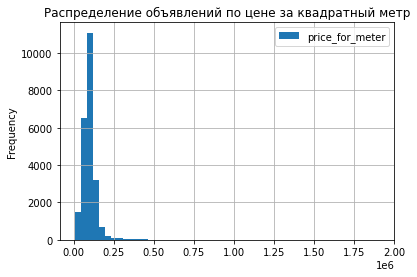

In [157]:
#построим гистаграмму по столбцу
data_new.plot(kind='hist',y='price_for_meter',grid=True,bins=50,title='Распределение объявлений по цене за квадратный метр',xlabel='цена за кв м',ylabel='кол-во объявлений')

<AxesSubplot:title={'center':'Распределение объявлений по цене за квадратный метр'}, ylabel='Frequency'>

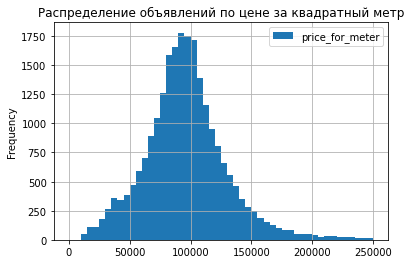

In [158]:
#увеличим зону до 250000
data_new.plot(kind='hist',y='price_for_meter',grid=True,bins=50,range=(0,250000), title='Распределение объявлений по цене за квадратный метр',xlabel='цена за кв м',ylabel='кол-во объявлений')

<AxesSubplot:title={'center':'Распределение объявлений по цене за квадратный метр'}, ylabel='Frequency'>

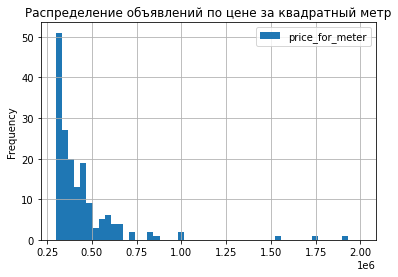

In [159]:
#увеличим зону от 250000 до 2000000
data_new.plot(kind='hist',y='price_for_meter',grid=True,bins=50,range=(300000,2000000),title='Распределение объявлений по цене за квадратный метр',xlabel='цена за кв м',ylabel='кол-во объявлений')

*Распределение ценовых значений за кв м находится в диапозоне от 7963 р до 1 907 500 р.\
БОльшая часть квартир имеет стоимость за кв м от 50 000 до 150 000 р. Значений в диапозоне от 200 000 р до 2 000 000 всего несколько штук.*

**ОБЩАЯ ПЛОЩАДЬ**

In [160]:
#опишем столбец
data_new['total_area'].describe()

count    23532.000000
mean        60.412285
std         35.532032
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [161]:
#построим сводную по сегментам по Санкт_Петербургу
#data_new.groupby(['location','price_segment']).agg({'total_area':['min','max','mean','median','count']})

<AxesSubplot:title={'center':'Распределение объявлений по общей площади'}, ylabel='Frequency'>

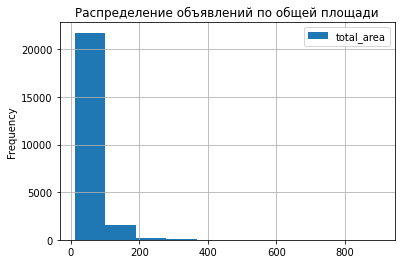

In [162]:
# построим гистограмму по столбцу
data_new.plot(kind='hist',y='total_area',grid=True,legend=True, title='Распределение объявлений по общей площади')

<AxesSubplot:title={'center':'Распределение объявлений по общей площади'}, ylabel='Frequency'>

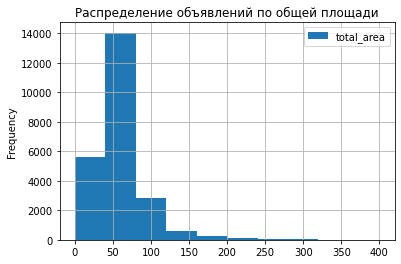

In [163]:
#увеличим масштаб в диапозоне до 400
data_new.plot(kind='hist',y='total_area',grid=True,legend=True,range=(0,400),title='Распределение объявлений по общей площади')

<div class="alert alert-info"> <b>Комментарии студента:</b> Увеличим еще больше график, чтобы увидеть пиковые значения в диапозоне от 0 до 100 </div>

<AxesSubplot:title={'center':'Распределение объявлений по общей площади'}, ylabel='Frequency'>

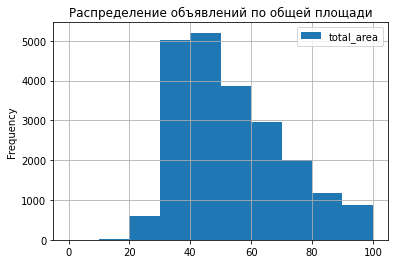

In [164]:
#увеличим масштаб в диапозоне до 100
data_new.plot(kind='hist',y='total_area',grid=True,legend=True,range=(0,100),title='Распределение объявлений по общей площади')

<AxesSubplot:title={'center':'Распределение объявлений по общей площади'}, ylabel='Frequency'>

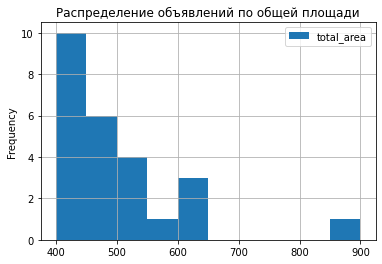

In [165]:
#увеличим масштаб в диапозоне от 400 до 800
data_new.plot(kind='hist',y='total_area',grid=True,legend=True,range=(400,900),title='Распределение объявлений по общей площади')

*Распределение значений по общей площади находится в диапозоне от 12 до 900 кв м.\
БОльшая часть квартир имеет Плошадь от 30 до 60 кв м. Квартир площадью от 100 до 900 кв всего несколько.*

**ЖИЛАЯ ПЛОЩАДЬ**

In [167]:
#опишем столбец с "чистыми" данными
data_new.query('living_area in @good_living_area.living_area')['living_area'].describe()

count    22081.000000
mean        34.943023
std         23.056392
min          2.000000
25%         18.900000
50%         30.100000
75%         42.800000
max        571.000000
Name: living_area, dtype: float64

<AxesSubplot:title={'center':'Распределение объявлений по жилой площади'}, ylabel='Frequency'>

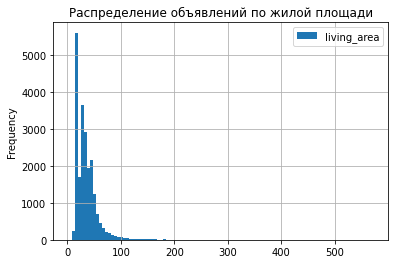

In [168]:
#построим гистрограмму по столбцу с "чистыми" данными
data_new.query('living_area in @good_living_area.living_area').plot(kind='hist',y='living_area',grid=True,legend=True,bins=100,title='Распределение объявлений по жилой площади')

<AxesSubplot:title={'center':'Распределение объявлений по жилой площади'}, ylabel='Frequency'>

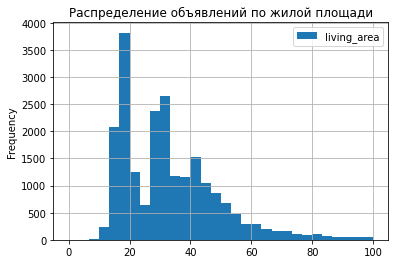

In [169]:
#увеличими масштаб до 100
data_new.query('living_area in @good_living_area.living_area').plot(kind='hist',y='living_area',grid=True,legend=True,range=(0,100),bins=30,title='Распределение объявлений по жилой площади')

<AxesSubplot:title={'center':'Распределение объявлений по жилой площади'}, ylabel='Frequency'>

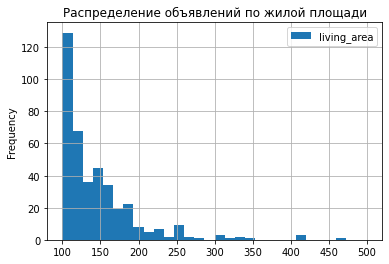

In [170]:
#увеличим масштаб от 100 до 500
data_new.query('living_area in @good_living_area.living_area').plot(kind='hist',y='living_area',grid=True,legend=True,range=(100,500),bins=30,title='Распределение объявлений по жилой площади')

*Распределение значений по жилой площади находится в диапозоне 2 до 571 кв м.\
БОльшая часть квартир имеет жилую плошадь от 10 до 50 кв м. Квартир с жилой площадью от 60 до 571 кв м меньше всего.*

**ПЛОЩАДЬ КУХНИ**

In [171]:
#построим сводную таблицу по площади кухни. По объявлениям, где указана площадь кухни
#data_new.query('kitchen_area in @good_kitchen_area.kitchen_area').pivot_table(index=['location','price_segment'],values='kitchen_area',aggfunc=['min','max','mean','median','count'])

In [172]:
#опишем столбец с "чистыми" данными
data_new.query('kitchen_area in @good_kitchen_area.kitchen_area')['kitchen_area'].describe()

count    22079.000000
mean        10.866727
std          6.769776
min          0.270000
25%          7.000000
50%          9.300000
75%         12.000000
max        230.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'Распределение объявлений по площади кухни'}, ylabel='Frequency'>

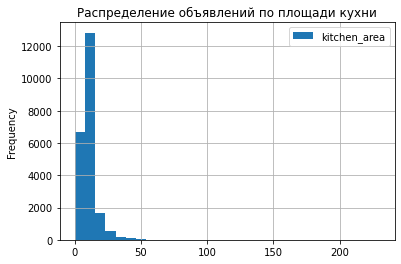

In [173]:
#построим гистограмму по столбцу с "чистыми" данными
data_new.query('kitchen_area in @good_kitchen_area.kitchen_area').plot(kind='hist',y='kitchen_area',grid=True,legend=True,bins=30,title='Распределение объявлений по площади кухни')

<AxesSubplot:title={'center':'Распределение объявлений по площади кухни'}, ylabel='Frequency'>

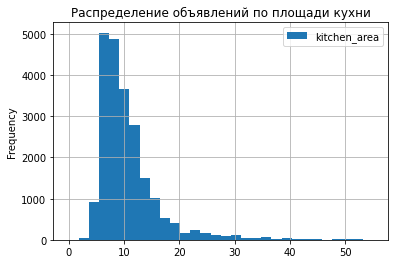

In [174]:
#увеличим масштаб до 50
data_new.query('kitchen_area in @good_kitchen_area.kitchen_area').plot(kind='hist',y='kitchen_area',grid=True,legend=True,range=(0,55),bins=30,title='Распределение объявлений по площади кухни')

<AxesSubplot:title={'center':'Распределение объявлений по площади кухни'}, ylabel='Frequency'>

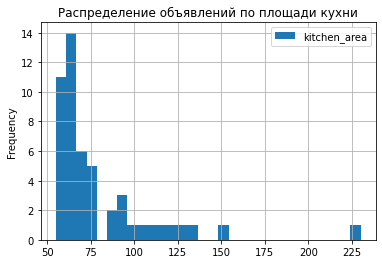

In [175]:
#увеличим масштаб от 50 до 225
data_new.query('kitchen_area in @good_kitchen_area.kitchen_area').plot(kind='hist',y='kitchen_area',grid=True,legend=True,range=(55,230),bins=30,title='Распределение объявлений по площади кухни')

*Распределение значений по площади кухни находится в диапозоне от 0 до 230 кв м.
БОльшая часть квартир имеет плошадь кухни от 4 до 20 кв м. Квартиры с площадью кухни от 20 до 230 кв м встречаются реже всего.*

**ЦЕНА ОБЪЕКТА**

In [176]:
# построим сводную таблицу по цене объекта
#data_new.pivot_table(index=['location','price_segment'],values='last_price',aggfunc=['min','max','mean','median','count'])

In [177]:
#опишем график
data_new['last_price_mln'].describe()

count    23532.000000
mean         6.555030
std         10.915848
min          0.430000
25%          3.450000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_mln, dtype: float64

<AxesSubplot:title={'center':'Распределение объявлений по финальной цене'}, ylabel='Frequency'>

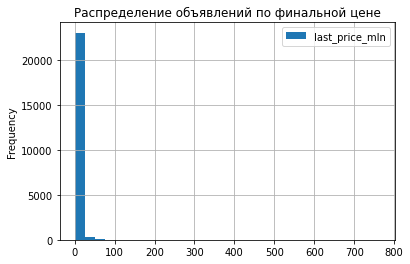

In [178]:
#построим диаграмму размаха по столбцу с ценой в млн
data_new.plot(kind='hist',y='last_price_mln',grid=True,legend=True,bins=30,title='Распределение объявлений по финальной цене')

<AxesSubplot:title={'center':'Распределение объявлений по финальной цене'}, ylabel='Frequency'>

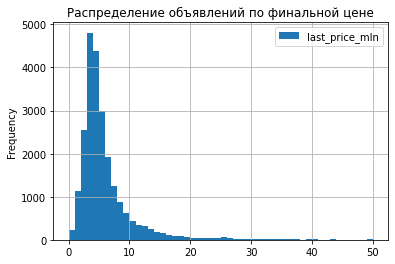

In [179]:
#увеличим масштаб от 0 до 50 млн
data_new.plot(kind='hist',y='last_price_mln',grid=True,legend=True,range=(0,50),bins=50,title='Распределение объявлений по финальной цене')

<AxesSubplot:title={'center':'Распределение объявлений по финальной цене'}, ylabel='Frequency'>

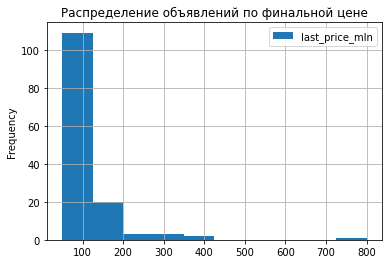

In [180]:
#увеличим масштаб от 50 до 800 млн
data_new.plot(kind='hist',y='last_price_mln',grid=True,legend=True,range=(50,800),title='Распределение объявлений по финальной цене')

*Распределение значений по финальной цене находится в диапозоне от 430 000 до 230 000 000 р. БОльшая часть квартир имеет стоимость от 2 000 000 до 12 000 000 р. Квартиры стоимостью от 120 000 000р встречаются реже всего.*

**КОЛ-ВО КОМНАТ**

In [181]:
data_new['rooms'].describe()

count    23532.000000
mean         2.074494
std          1.076134
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'Распределение объявлений по кол-ву комнат'}, ylabel='Frequency'>

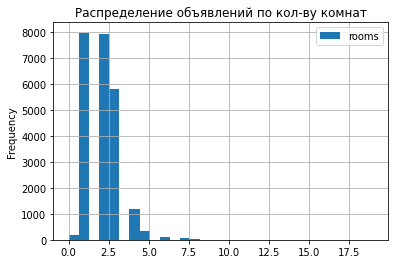

In [182]:
#посторим диаграмму размаха
data_new.plot(kind='hist',y='rooms',grid=True,legend=True,bins=30,title='Распределение объявлений по кол-ву комнат')

<AxesSubplot:title={'center':'Распределение объявлений по кол-ву комнат'}, ylabel='Frequency'>

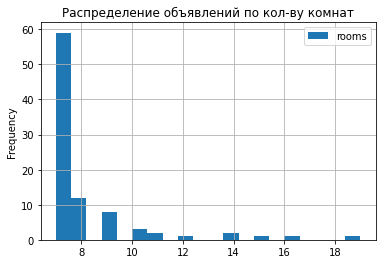

In [183]:
#увеличим масштаб от 7 до 10
data_new.plot(kind='hist',y='rooms',grid=True,legend=True,bins=20,range=(7,19),title='Распределение объявлений по кол-ву комнат')

*Распределение значений по кол-ву комнат находится в диапозоне от 0 до 19. БОльшая часть квартир имеет 1-3 комнаты. Квартиры с кол-вом комнат более 5 встречаются реже всего.*

**ВЫСОТА ПОТОЛКОВ**

In [184]:
#опишем столбец с "чистыми данными"
good_ceiling_height['ceiling_height'].describe()

count    14400.000000
mean         2.726934
std          0.270660
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Распределение объявлений по высоте потолков'}, ylabel='Frequency'>

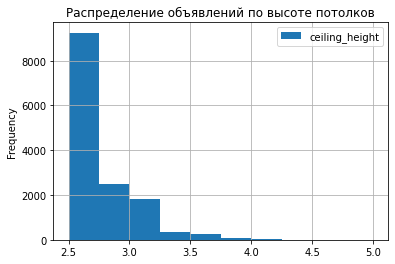

In [185]:
#построим гистаграмму с "чистыми" данными
data_new.query('ceiling_height in @good_ceiling_height.ceiling_height').plot(kind='hist',y='ceiling_height',grid=True,legend=True,title='Распределение объявлений по высоте потолков')

*Распределение значений по высоте потолков находится в диапозоне от 2,5 до 5 м. БОльшая часть квартир имеет высоту потолков 2,5-3м. Квартиры с высотой потолков более 3 м встречаются реже всего.*

**ЭТАЖ КВАРТИРЫ**

In [186]:
data_new['floor'].describe()

count    23532.000000
mean         5.884498
std          4.874787
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:title={'center':'Распределение объявлений по этажу квартиры'}, ylabel='Frequency'>

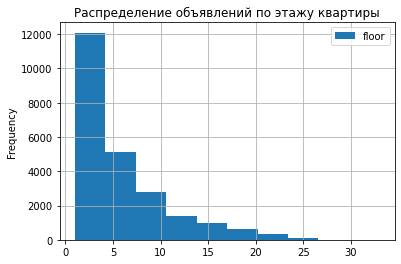

In [187]:
#построим гистаграмму по столбцу с этажом квартиры
data_new.query('floor in @good_floors_total.floor').plot(kind='hist',y='floor',grid=True,legend=True,title='Распределение объявлений по этажу квартиры')

*Распределение значений по этажу квартиры находится в диапозоне от 1 до 33. БОльшая часть квартир находится на 1-10 этаже. Квартир, расположенных на этаже выше 10, значительно меньше.*

**ТИП ЭТАЖА КВАРТИРЫ**

In [188]:
#сгруппируем данные по типу этажа квартиры: посмотрим, сколько квартир принадлежит к каждому типу этажей
data_new.query('floors_total in @good_floors_total.floors_total').groupby('floor_type')['last_price'].count()

floor_type
другой       17236
первый        2870
последний     3343
Name: last_price, dtype: int64

<AxesSubplot:title={'center':'Распределение объявлений по типу этажа квартиры'}, xlabel='floor_type'>

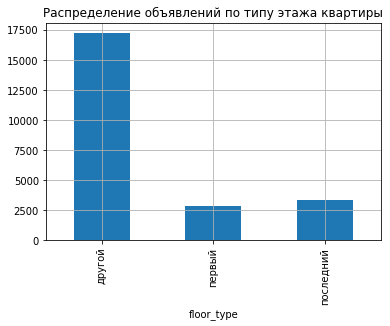

In [189]:
#построим столбчатую диаграмму
data_new.query('floors_total in @good_floors_total.floors_total').groupby('floor_type')['last_price'].count().plot(kind='bar',grid=True,title='Распределение объявлений по типу этажа квартиры')

*Большая часть квартир расположены не на первом и не на последнем этажах*

**ОБЩЕЕ КОЛ-ВО ЭТАЖЕЙ В ДОМЕ**

In [190]:
#опишем столбец с "чистыми" данными
data_new.query('floors_total in @good_floors_total.floors_total')['floors_total'].describe()

count    23449.000000
mean        10.660881
std          6.582771
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:title={'center':'Распределение объявлений по кол-ву этажей в доме'}, ylabel='Frequency'>

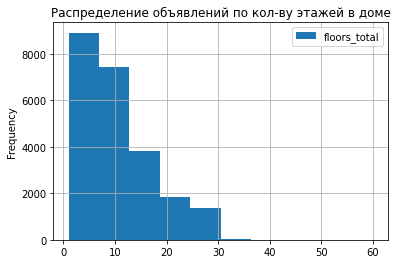

In [191]:
#построим гистаграмму
data_new.query('floors_total in @good_floors_total.floors_total').plot(kind='hist',y='floors_total',grid=True,legend=True,title='Распределение объявлений по кол-ву этажей в доме')

*Большая часть квартир расположена в домах, с кол-вом этажей от 1 до 20. Значения больше 20 встречаются реже*

**РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА В МЕТРАХ**

Большое кол-во данных было пропущено (около 30%). Поэтому построим график только по даным, в которых нет пропущенных значений.

<AxesSubplot:title={'center':'Распределение объявлений по расстоянию до центра города'}, ylabel='Frequency'>

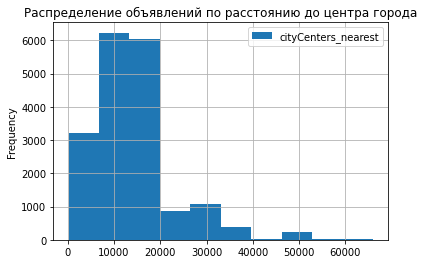

In [192]:
data_new.query('cityCenters_nearest in @good_cityCenters_nearest.cityCenters_nearest').plot(kind='hist',y='cityCenters_nearest',grid=True,legend=True,title='Распределение объявлений по расстоянию до центра города')

*Большая часть квартир находится на расстоянии до 20 км до центра города. Реже встречаются квартиры, расположенные в более, чем 20 км от центра. Значения более 40 км встречаются совсем редко*

**РАССТОЯНИЕ ДО БЛИЖАЙШЕГО АЭРОПОРТА**

<AxesSubplot:title={'center':'Распределение объявлений по расстоянию до аэропорта'}, ylabel='Frequency'>

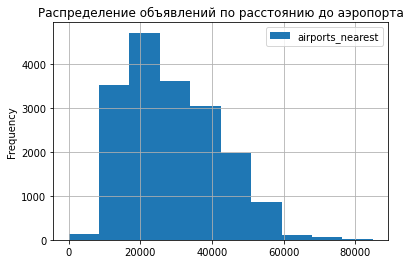

In [193]:
data_new.query('airports_nearest in @good_airports_nearest.airports_nearest').plot(kind='hist',y='airports_nearest',grid=True,legend=True,title='Распределение объявлений по расстоянию до аэропорта')

*Большая часть квартир находится на расстоянии от 10 до 50 км до аэропорта. Реже встречаются квартиры, расположенные в более, чем 50 км до аэропорта. Значения более 60 км встречаются совсем редко*

**РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ПАРКА**

<AxesSubplot:title={'center':'Распределение объявлений по расстоянию до парка'}, ylabel='Frequency'>

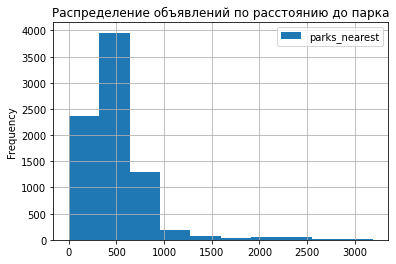

In [194]:
data_new.query('parks_nearest in @good_parks_nearest.parks_nearest').plot(kind='hist',y='parks_nearest',grid=True,legend=True,title='Распределение объявлений по расстоянию до парка')

*Большая часть квартир находится на расстоянии до 1 км до ближайшего парка. Реже встречаются квартиры, расположенные в более, чем 1 км до парка*

**ДЕНЬ ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ**

Посторим столбчатую диаграмму по столбцу День размещения, предварительно посчитав кол-во объявлений, размещенных в каждый день недели

<AxesSubplot:title={'center':'Распределение объявлений по дням недели размещения'}, xlabel='Дни недели', ylabel='Кол-во объявлений'>

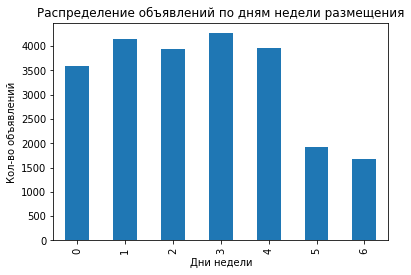

In [195]:
data_new['weekday_exposition'].value_counts().sort_index().plot(kind='bar',title='Распределение объявлений по дням недели размещения',xlabel='Дни недели',ylabel='Кол-во объявлений') 

*В целом, в будние дни размещалось примерно одинаковое кол-во объявлений. В выходные дни размешалось примерно в 2 раза меньше объявлений*

**МЕСЯЦ ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ**

Посторим столбчатую диаграмму по столбцу Месяц размещения, предварительно посчитав кол-во объявлений, размещенных в каждый месяц

<AxesSubplot:title={'center':'Распределение объявлений по месяцам размещения'}, xlabel='Месяцы', ylabel='Кол-во объявлений'>

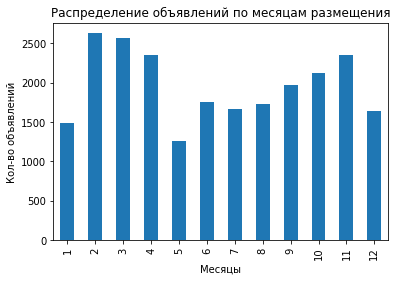

In [196]:
data_new['month_exposition'].value_counts().sort_index().plot(kind='bar',title='Распределение объявлений по месяцам размещения',xlabel='Месяцы',ylabel='Кол-во объявлений') 

*В Январе, Мае, Декабре заметен спад в размещениях объявлений. В летние месяцы также размещается поменьше объявлений. Скорей всего, это связано с праздниками в Январе и Мае, и периодом отпусков в летние месяцы. В остальные месяцы распределение равномерное*

**ВЫВОД:**\
В соответствии с задачей раздела 4.1, построены 15 гистограмм по исследуемым параметрам.\
Основные выводы: площадь квартир находится в диапозоне от 12 до 900 кв м. По цене полной цене – от 430 000 до 230 000 000 р. По цене за кв м от 7963 р до 1 907 500 р.\
Большая часть квартир имеет площадь от 30 до 80 кв м, имеет стоимость от 50 000 до 150 000 р за кв м, полную стоимость от 2 000 000 до 12 000 000 р.\
Квартиры площадью более 100 кв м, стоимостью от 200 000 р за кв м, полной стоимостью от 120 000 000 р встречаются реже.
БОльшая часть квартир имеет 1-3 комнаты, находится на расстоянии до 20 км от центра города, от 10 до 50 км до аэропорта, до 1 км от парка.\
Большая часть квартир имеет потолки от 2,5 до 3 м и находится не на первом, и не на последних этажах.\
В выходные размещается в 2 раза меньше объявлений, чем в будни. Говоря о месяцах, меньше всего объявлений были размещены в Январе, Мае, и в летние месяцы.


**4.2 ИЗУЧИТЕ, КАК БЫСТРО ПРОДАВАЛИСЬ ОБЪЯВЛЕНИЯ**

In [197]:
data_new['days_exposition'].describe()

count    20367.000000
mean       181.174596
std        220.052740
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'Распределение объявлений по кол-ву дней размещения'}, ylabel='Frequency'>

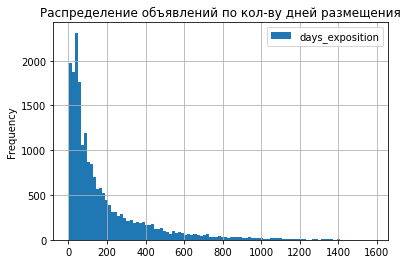

In [198]:
data_new.plot(kind='hist',y='days_exposition',grid=True,title='Распределение объявлений по кол-ву дней размещения',bins=100)

<div class="alert alert-info"> <b>Комментарии студента:</b> Построим ящик с усами</div>


<AxesSubplot:title={'center':'Распределение объявлений по кол-ву дней размещения'}>

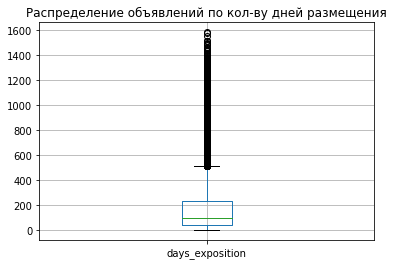

In [199]:
#построим диаграмму размаха
data_new.plot(y='days_exposition',kind='box',grid=True,title='Распределение объявлений по кол-ву дней размещения')

<AxesSubplot:title={'center':'Распределение объявлений по кол-ву дней размещения'}>

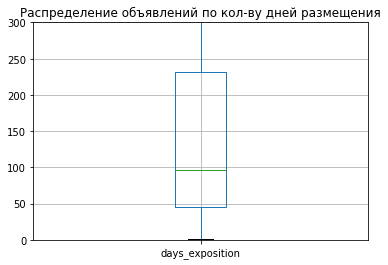

In [200]:
#увеличим масштаб
data_new.plot(y='days_exposition',kind='box',grid=True,title='Распределение объявлений по кол-ву дней размещения',ylim=(0,300))

<div class="alert alert-info"> <b>Комментарии студента:</b> Исправим вывод в соответствии с новым построенным графиком</div>

*В среднем, продажа жилья занимает около 96 дней. Продажи в течение менне 50 дней можно считать быстрыми,а более 230 дней-долгими. Продажи более 500 дней можно считать необычно долгими, так как они сильно далеки от среднего значения*

**4.3 КАКИЕ ФАКТОРЫ БОЛЬШЕ ВСЕГО ВЛИЯЮТ НА ОБЩУЮ (ПОЛНУЮ СТОИМОСТЬ ОБЪЕКТА)**

**Зависимость цены от площади объекта**

<AxesSubplot:title={'center':'Зависимость цены от площади объекта'}, xlabel='total_area', ylabel='last_price'>

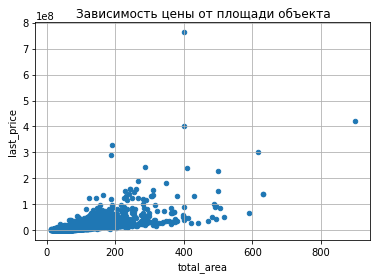

In [201]:
#построим диаграмму рассеивания по двум величинам
data_new.plot(kind='scatter',x='total_area',y='last_price',grid=True,title='Зависимость цены от площади объекта')

In [202]:
#рассчитаем коэффицент Пирсона
data_new['total_area'].corr(data_new['last_price'])

0.6567177320923782

*На графике наблюдается зависимость цены от площади объекта. График показывает положительную корреляцию: чем больше площадь, тем выше цена объекта. Коэффицент Пирсона показывает тесную связь*

**Зависимость цены от жилой площади**

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

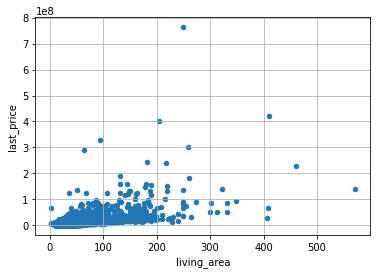

In [203]:
#построим диаграмму рассеивания по двум величинам
data_new.query('living_area in @good_living_area.living_area').plot(kind='scatter',x='living_area',y='last_price',grid=True)

In [204]:
#рассчитаем коэффицент Пирсона
data_new['living_area'].corr(data_new['last_price'])

0.5747462613946437

*На графике наблюдается зависимость цены от жилой площади объекта. График показывает положительную корреляцию: чем больше площадь, тем выше цена объекта. Коэффицент Пирсона показывает связь двух величин, но не слишком тесную*

**Зависимость цены от площади кухни**

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

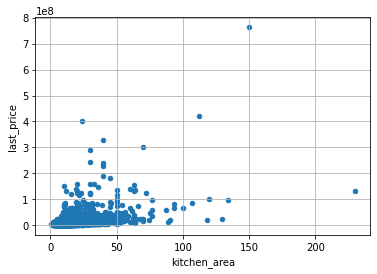

In [205]:
#построим диаграмму рассеивания по двум величинам
data_new.query('kitchen_area in @good_kitchen_area.kitchen_area').plot(kind='scatter',x='kitchen_area',y='last_price',grid=True)

In [206]:
#рассчитаем коэффицент Пирсона
data_new['kitchen_area'].corr(data_new['last_price'])

0.4946298635622277

*На графике наблюдается зависимость цены от площади кухни, но более слабая, чем на предыдущих графиках. Тем не менее, график показывает положительную корреляцию: чем больше площадь, тем выше цена объекта. Коэффицент Пирсона показывает связь двух величин, но не слишком тесную*

**Зависимость цены от кол-ва комнат**

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

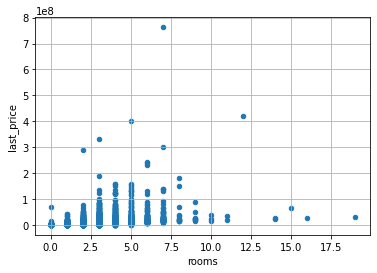

In [207]:
#построим диаграмму рассеивания по двум величинам
data_new.plot(kind='scatter',x='rooms',y='last_price',grid=True)

In [208]:
#построим диаграмму рассеивания по двум величинам
data_new['rooms'].corr(data_new['last_price'])

0.364156510410454

*На графике не наблюдается большой зависимости стоимости от кол-ва комнат. Видно, что при увеличении кол-ва комнат стоимость увеличивается не всегда, в отличие от площади объекта. Возможно, есть квартиры с большой площадью и небольшим кол-вом комнат, просто комнаты большие.\
Коэффицент Пирсона подтверждает отсутствие тесной взаимосвязи.*

**Зависимость цены от типа этажа**

Посчитаем среднюю цену продажу по каждому типу этажей и построим столбчатую диаграмму

<AxesSubplot:title={'center':'Средняя стоимость квартиры по типам этажей'}, xlabel='floor_type'>

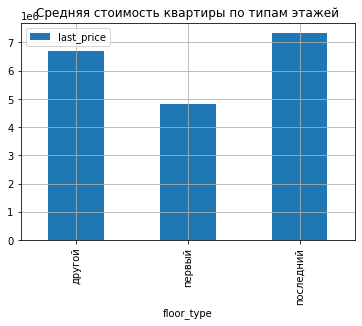

In [209]:
#построим диаграмму рассеивания по двум величинам
data_new.query('floors_total in @good_floors_total.floors_total').pivot_table(index=['floor_type'],values='last_price',aggfunc='mean').plot(kind='bar',grid=True, title='Средняя стоимость квартиры по типам этажей')

*График показывает, что квартиры на первом этаже стоят в среднем на 30% дешевле, чем квартиры на других этажах. Разницы между последними этажами и остальными незначительная.*

Посчитаем медианную цену продажи по каждому типу этажей и построим столбчатую диаграмму

<AxesSubplot:title={'center':'Медианная стоимость квартиры по типам этажей'}, xlabel='floor_type', ylabel='средняя стоимость объекта'>

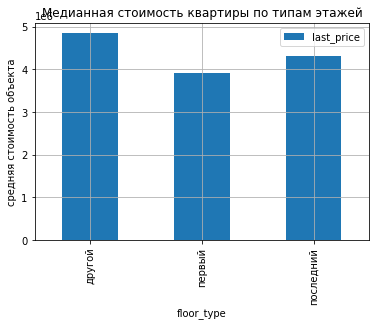

In [210]:
data_new.query('floors_total in @good_floors_total.floors_total').pivot_table(index=['floor_type'],values='last_price',aggfunc='median').plot(kind='bar',grid=True,ylabel='средняя стоимость объекта',title='Медианная стоимость квартиры по типам этажей')

*График показывает, что квартиры на первом этаже стоят в среднем на 30% дешевле, чем квартиры на других этажах. Разницы между последними этажами и остальными незначительная.*

**Зависимость цены от даты размещения (день, месяц, год)**

<AxesSubplot:title={'center':'Зависимость цены от дня размещения'}, xlabel='weekday_exposition', ylabel='средняя стоимость объекта'>

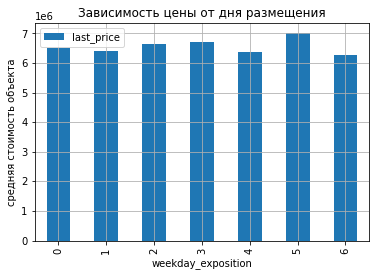

In [211]:
#построим столбчатую диаграмму ср средней ценой за кв м по каждому дню размещения
data_new.pivot_table(index=['weekday_exposition'],values='last_price',aggfunc='mean').plot(kind='bar',grid=True,ylabel='средняя стоимость объекта',title='Зависимость цены от дня размещения')

*По графику не видна очевидная зависимость между днем размещения и ценой*

<AxesSubplot:title={'center':'Зависимость цены от месяца размещения'}, xlabel='month_exposition', ylabel='средняя стоимость объекта'>

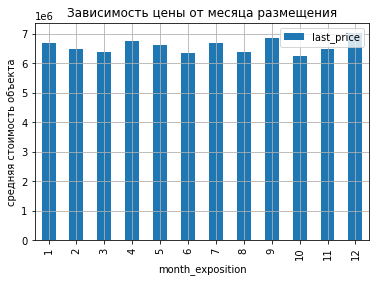

In [212]:
#построим столбчатую диаграмму ср средней ценой за кв м по каждому месяцу размещения
data_new.pivot_table(index=['month_exposition'],values='last_price',aggfunc='mean').plot(kind='bar',grid=True,ylabel='средняя стоимость объекта',title='Зависимость цены от месяца размещения')

*По графику не видна очевидная зависимость между месяцем размещения и ценой*

<AxesSubplot:title={'center':'Зависимость цены от года размещения'}, xlabel='year_exposition', ylabel='средняя стоимость объекта'>

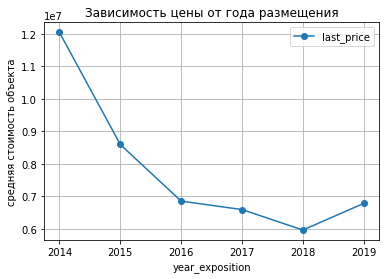

In [213]:
#построим график со средней ценой за кв м по каждому году размещения
data_new.pivot_table(index=['year_exposition'],values='last_price',aggfunc='mean').plot(grid=True,style='o-',ylabel='средняя стоимость объекта',title='Зависимость цены от года размещения')

<div class="alert alert-info"> <b>Комментарии студента:</b> Рассмотрим динамику цены и площади продаваемых квартир.</div>


<AxesSubplot:title={'center':'Динамика изменения средней площади объекта размещения'}, xlabel='year_exposition', ylabel='средняя площадь объекта'>

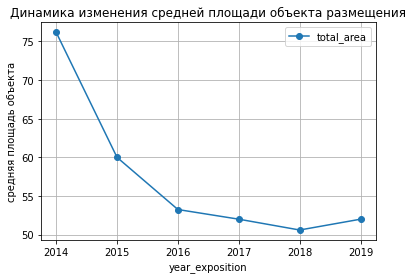

In [214]:
#построим столбчатую график динамикой средней площадью квартир по каждому году размещения
data_new.pivot_table(index=['year_exposition'],values='total_area',aggfunc='median').plot(grid=True,style='o-',ylabel='средняя площадь объекта',title='Динамика изменения средней площади объекта размещения')

<div class="alert alert-info"> <b>Комментарии студента:</b> Изменим вывод-старый вывод</div>

*График показывает, что объявления, размещенные в 2014 году, имеют самую высокую среднюю стоимость за объект. Далее ежегодно средняя стоимость размещенных объектов снижается. Это может быть связано с тем, что в датафрейме за 2014 и за 2015г остались только объявления с ценой выше рынка, а по более низкой цене были проданы.*

<div class="alert alert-info"> <b>Комментарии студента:</b> Новый вывод</div>

*График показывает, что объявления, размещенные в 2014 году, имеют самую высокую среднюю стоимость за объект. Далее ежегодно средняя стоимость размещенных объектов снижается. Также мы изучили динамику изменения площади продаваемых квартир - она схожа с динамикой цены. Похоже, что упала не столько цена, сколько площадь продаваемых квартир. Это может быть связано с тем, что площадь жилья, например, в новостройках, которых строится все больше последние годы, площадь жилья становится меньше и меньше*


**ВЫВОД:**\
Больше всего на стоимость объекта влияет площадь жилья, локация, расстояние до центра, и в меньшей степени этаж объекта (квартиры на 1 этаже на 30% дешевле) и жилая площадь. Площадь кухни и кол-во комнат на цену практически не влияют.

**4.4 Анализ десяти населённых пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра**

In [215]:
#определим топ10 локаций с макимальным кол-вом размещенных объявлений
top_locations=data_new['locality_name'].value_counts().head(10)

In [216]:
#выведем список на экран
top_locations

Санкт-Петербург    15701
Мурино               565
Кудрово              445
Шушары               430
Всеволожск           398
Пушкин               358
Колпино              336
Парголово            324
Гатчина              304
Выборг               237
Name: locality_name, dtype: int64

In [217]:
top_locations.index

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг'],
      dtype='object')

In [218]:
#создадим новый датафрейм, куда войдут только населенные пункты из топ 10
price_for_meter_top=data_new[data_new['locality_name'].isin(top_locations.index)]

In [219]:
#проверим, выполнилось ли изменение
price_for_meter_top['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Парголово', 'Мурино', 'Пушкин',
       'Кудрово', 'Колпино', 'Гатчина', 'Выборг', 'Всеволожск'],
      dtype=object)

In [220]:
#построим сводную таблицу со со средней ценой за кв м по каждому населенному пункту
price_for_meter_top_pivot=price_for_meter_top.pivot_table(index='locality_name',values='price_for_meter',aggfunc='median').sort_values(by='price_for_meter')

In [221]:
price_for_meter_top_pivot['price_for_meter']

locality_name
Выборг              58158.0
Всеволожск          65789.0
Гатчина             67861.0
Колпино             74690.0
Шушары              76439.0
Мурино              84877.0
Парголово           91473.0
Кудрово             94444.0
Пушкин              99487.0
Санкт-Петербург    104808.0
Name: price_for_meter, dtype: float64

In [222]:
#выведем среднюю цену за кв м по ТОП 10 населенным пунктам с макс. кол-вом объявлений
price_for_meter_top_pivot['price_for_meter'].median()

80658.0

*Выявлено 10 населенных пунктов с максимальным кол-вом размещенных объявлений.\
Максимальное кол-во объявлений размещено в г. Санкт-Петербург, последнее место в списке топ 10 - Выборг.\
Средняя стоимость кв м в данных населенных пунктах - 80 658р.\
Самая низкая средняя стоимость за кв м в Выборге - 58158р за кв м. Самая высокая - в Санкт-Петербруге - 104 808 р за кв м.*

In [225]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15721,5500000.0
Мурино,590,3400000.0
Кудрово,472,3890000.0
Шушары,440,3950000.0
Всеволожск,398,3450000.0
Пушкин,369,5180000.0
Колпино,338,3600000.0
Парголово,327,4100000.0
Гатчина,307,3100000.0


**4.5 Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра**

Вычислим среднюю среднюю цену каждого км. Сгруппируем данные по км, и посчитаем среднее значение по столбцу "Цена за кв м", тем самым получив среднюю цену за км.

In [223]:
data_new.query('locality_name=="Санкт-Петербург"').groupby('cityCenters_nearest_km').agg({'price_for_meter':'mean'})

,price_for_meter
cityCenters_nearest_km,
0.0,245833.518519
1.0,169937.189474
2.0,156437.487013
3.0,121387.442857
4.0,133793.462774
5.0,140770.598039
6.0,151196.594814
7.0,156432.610979
8.0,125015.021849


<AxesSubplot:title={'center':'График изменения цены кв м в по степени удаленности от центра'}, xlabel='км от центра', ylabel='цена за кв м'>

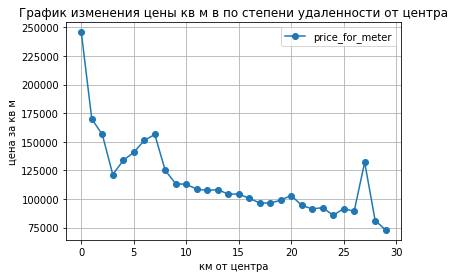

In [224]:
#построим график изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра
data_new.query('locality_name=="Санкт-Петербург"').groupby('cityCenters_nearest_km').agg({'price_for_meter':'mean'}).plot(grid=True,style='o-',title='График изменения цены кв м в по степени удаленности от центра',xlabel='км от центра',ylabel='цена за кв м')

*График показывает прямую зависимость стоимости кв м от расстояния до центра. Чем ближе к центру, чем выше цена. Наблюдлюдаются пиковые значения на 5 км и 27 км. Возможно, район в 5 км от центра считается престижным, чем объясняется высокая стоимость. Причину пика на 27 км сложно понять, возможно, это так же престижный район, возможно, есть какие-то объявления, выбивающиеся из общего диапозона, которые влияют на распределение*

### Общий вывод

**Предобработка:**\
    В проанализированном датафрейме имелись пропущенные значения, некорректные типы данных, дубликаты, ошибочные значения в данных.
Пропущенные значения были частично заменены, тип данных исправлен, дубликаты обработаны и удалены, ошибочные значения восстановлены и частично проработаны, удалены объявления без населенных пунктов.
Также, удален ряд «аномальных значений», таких как квартиры с несоответствием цены и площади.

**Характеристики размещенных объявлений**:\
    Площадь квартир находится в диапозоне от 12 до 900 кв м. Стоимость – от 430 000 до 230 000 000 р. Цена за кв м - от 7963 р до 1 907 500 р. Есть 3 ценовых сегмента: low, medium, premium.\
    Большая часть квартир имеет площадь от 30 до 80 кв м, цену от 50 000 до 150 000 р за кв м, стоимость от 2 000 000 до 12 000 000 р.\
    Квартиры площадью более 100 кв м, с ценой от 200 000 р за кв м, стоимостью от 120 000 000 р встречаются реже.
    
   БОльшая часть квартир имеет 1-3 комнаты, находится на расстоянии до 20 км от центра города. 
   
   Меньше всего объявлений было размещены в Январе, Мае, и в летние месяцы.
   
   В среднем, жилье продается за 96 дней

Есть ТОП 10 населенных пунктов с максимальных кол-вом размещенных объявлений: Санкт-Петербург, Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчина, Выборг.
Средняя цена за кв м в данных населенных пунктах - 80 658 р за кв м. Максимальная цена в Санкт-Петербурге - 104 808  р за кв м.

**Какие факторы больше всего влияют на стоимость?**\
Больше всего на стоимость объекта влияет площадь жилья, локация, расстояние до центра, и в меньшей степени - этаж объекта (квартиры на 1 этаже на 30% дешевле).\
Чем больше площадь, чем ближе к центру, тем дороже цена.\
Квартиры большой площади в центре Санкт-Петербурга, размещенные не на 1 этаже, стоят дороже всех.
